In [18]:
%matplotlib notebook

import numpy as np
import cv2
import os

from DoG import DoG
from file_manager import File_manager
from wdd_decoder_functions import create_diff_images, calculate_image_sum_for_frame, calculate_image_sum_for_angle


from matplotlib import pyplot as plt
from joblib import Parallel, delayed
from sklearn.linear_model import TheilSenRegressor
from mpl_toolkits.mplot3d import Axes3D

In [17]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [4]:
angles = np.arange(0, 360, 1)

angles.sort()

maxima = []
mean_val = []

cov_matrix = np.matrix([[6., 0],[0, 2.]])

smothing = np.matrix([[1,1,1],[1,1,1],[1,1,1]]) / 9

path = '/home/sascwitt/Projects/test/WDs/'
folders = os.listdir(path)
folders.sort()

In [5]:
dog = DoG().get_dog_kernel

In [19]:
fm_csv = File_manager("/home/sascwitt/Projects/test/WDs/").read_csv

In [7]:
diff_img = create_diff_images(path, folders)

In [8]:
kernels = []

for angle in angles:
    kernels.append(dog(angle, 7, 2, 13, cov_matrix))

In [9]:
img_list = Parallel(n_jobs=-1, verbose=11)(delayed(calculate_image_sum_for_frame)(angles, key, img_arrays, kernels) for key, img_arrays in diff_img.items())

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.2s
[Paralle

In [10]:
keys = []
images = []

for img in img_list:
        images.append(img[0])
        keys.append(img[1])

<IPython.core.display.Javascript object>


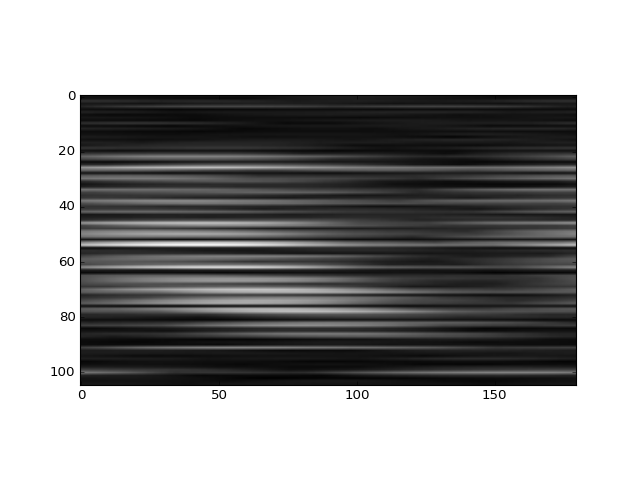

In [11]:
plt.imshow(images[0], 'gray')
plt.show()

In [12]:
a = float(fm_csv(keys[1] + 'result.csv')['Angle']) % 360

if a > 180:
    a -= 180

    
ta = np.median(images[1])

pa = np.arctan2(np.sin(a - ta), np.cos(a - ta))

print(pa)

    
est = TheilSenRegressor()
est.fit(np.arange(0, len(images[1]))[:,np.newaxis], images[1].argmax(axis=1))
C = est.predict(np.arange(0,len(images[1]))[:,np.newaxis])


-1.11980831722


/home/sascwitt/Projects/test/WDs/20160814_1003_1/7/
42.8789036033
58.0


<IPython.core.display.Javascript object>


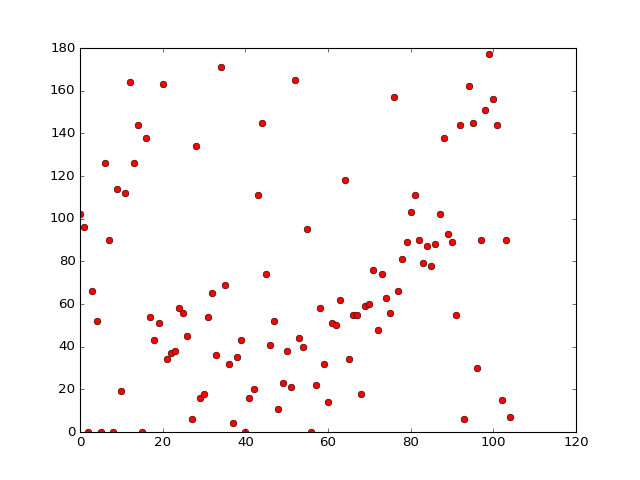

/home/sascwitt/Projects/test/WDs/20160814_1003_1/18/
13.0693178963
44.0


<IPython.core.display.Javascript object>


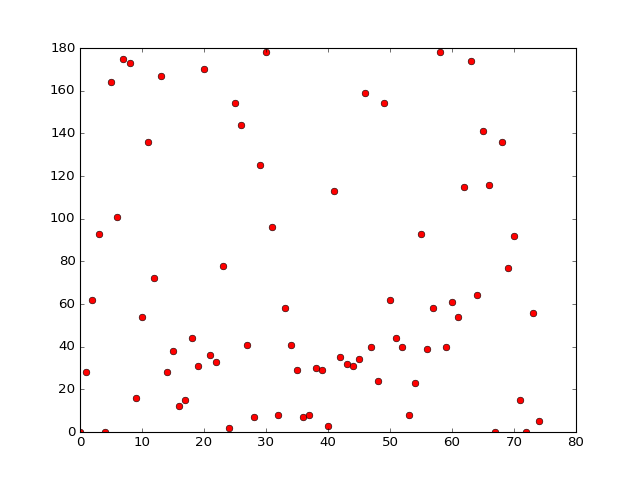

/home/sascwitt/Projects/test/WDs/20160814_1016_1/5/
32.412306618
45.0


<IPython.core.display.Javascript object>


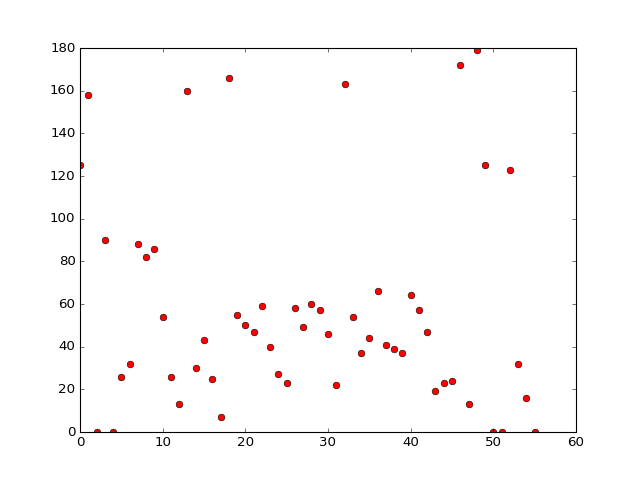

/home/sascwitt/Projects/test/WDs/20160814_1002_1/16/
22.1094483438
35.5


<IPython.core.display.Javascript object>


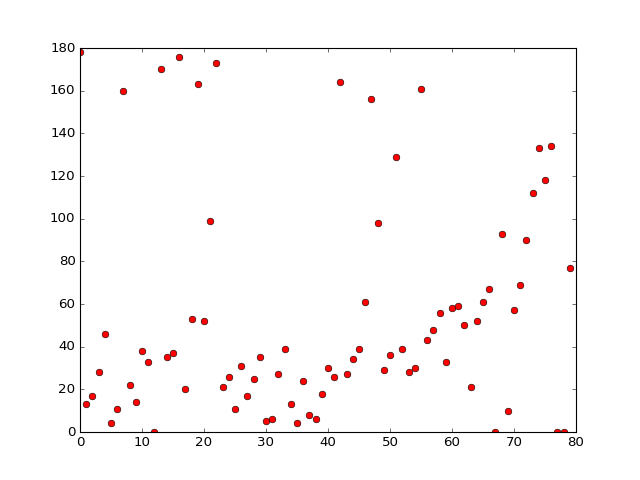

/home/sascwitt/Projects/test/WDs/20160814_1001_1/1/
38.7741709356
54.0


<IPython.core.display.Javascript object>


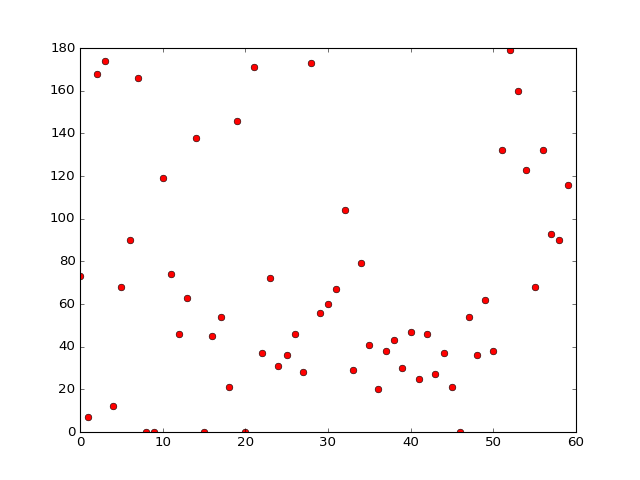

/home/sascwitt/Projects/test/WDs/20160814_1003_1/17/
52.305759533000014
49.0


<IPython.core.display.Javascript object>


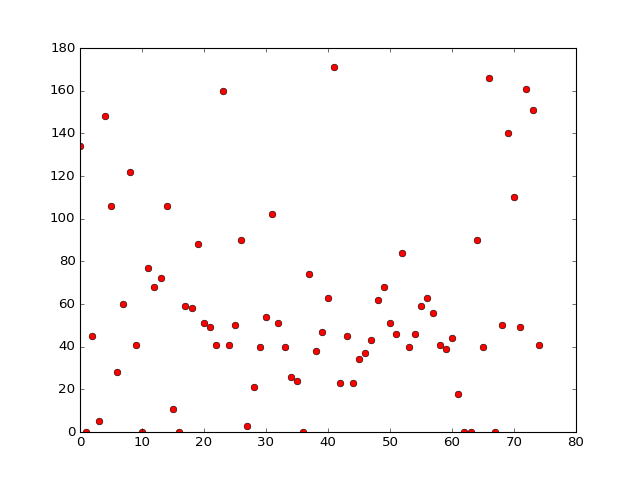

/home/sascwitt/Projects/test/WDs/20160814_1007_1/16/
16.9275130641
41.5


<IPython.core.display.Javascript object>


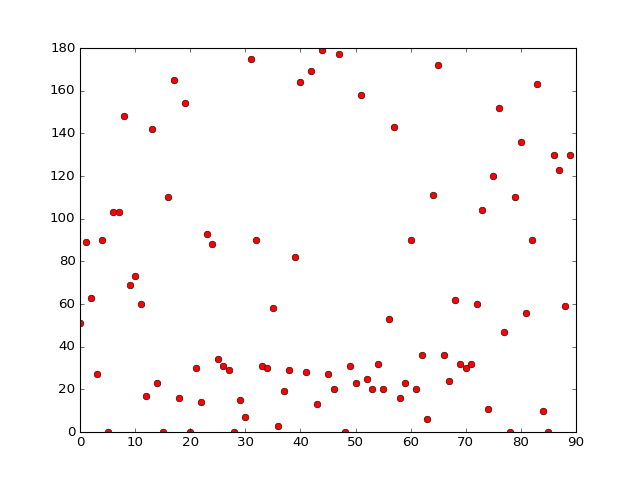

/home/sascwitt/Projects/test/WDs/20160814_1008_1/11/
31.9081069357
41.0


<IPython.core.display.Javascript object>


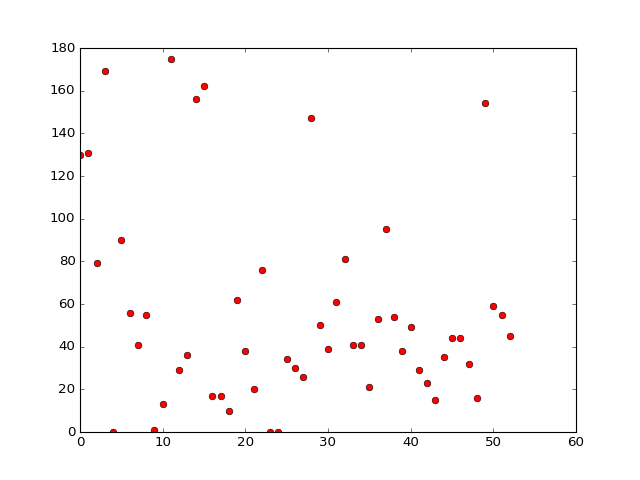

/home/sascwitt/Projects/test/WDs/20160814_1002_1/20/
178.18169703554997
90.0


<IPython.core.display.Javascript object>


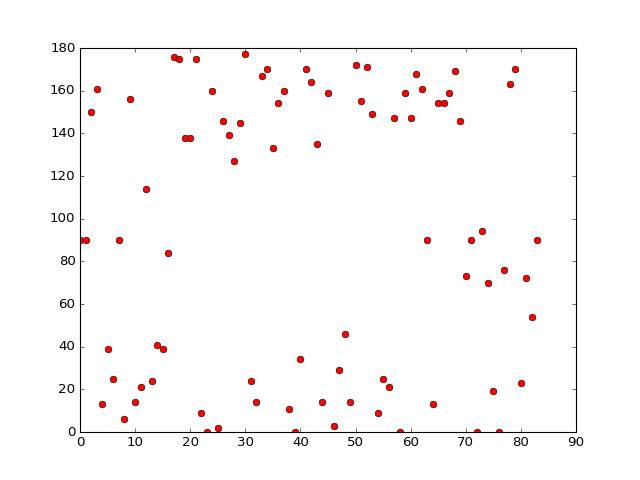

/home/sascwitt/Projects/test/WDs/20160814_1007_1/3/
4.96974072811
33.0


<IPython.core.display.Javascript object>


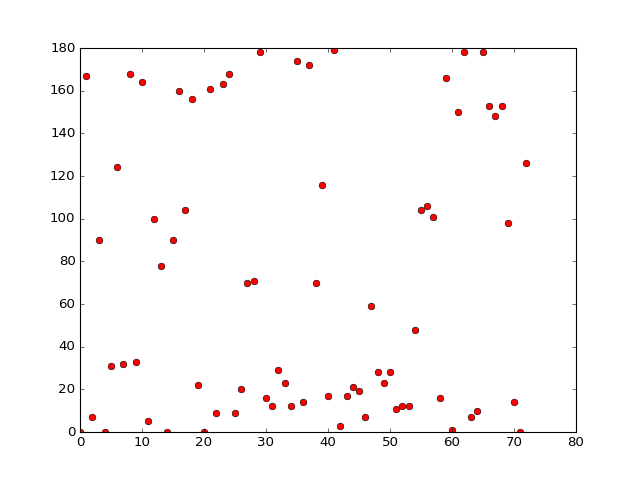

/home/sascwitt/Projects/test/WDs/20160814_1011_1/3/
142.81529354679998
115.0


<IPython.core.display.Javascript object>


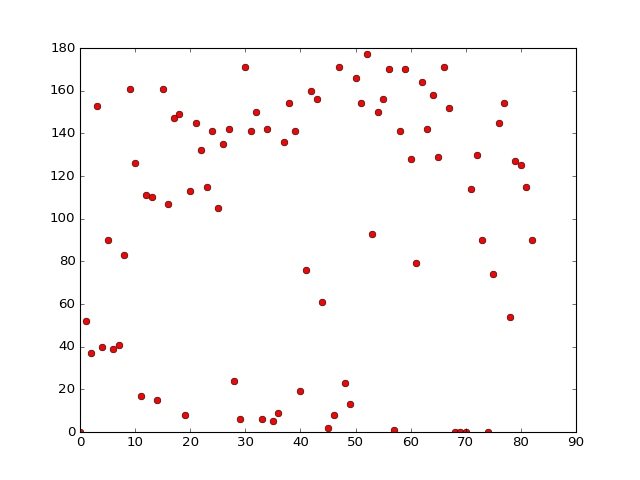

/home/sascwitt/Projects/test/WDs/20160814_1008_1/17/
18.7413404452
31.5


<IPython.core.display.Javascript object>


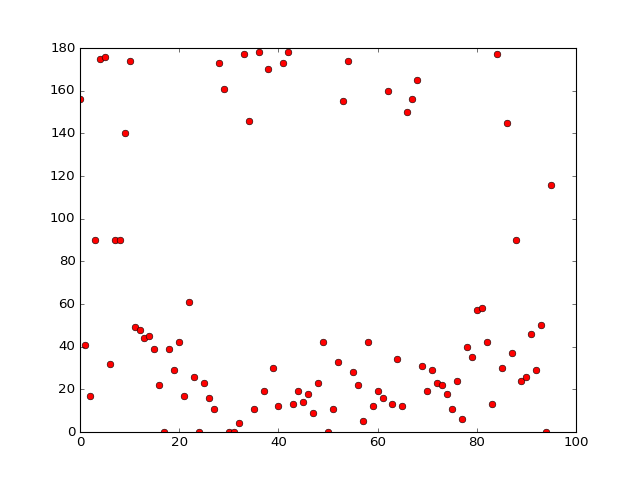

/home/sascwitt/Projects/test/WDs/20160814_1002_1/19/
19.1790080258
33.0


<IPython.core.display.Javascript object>


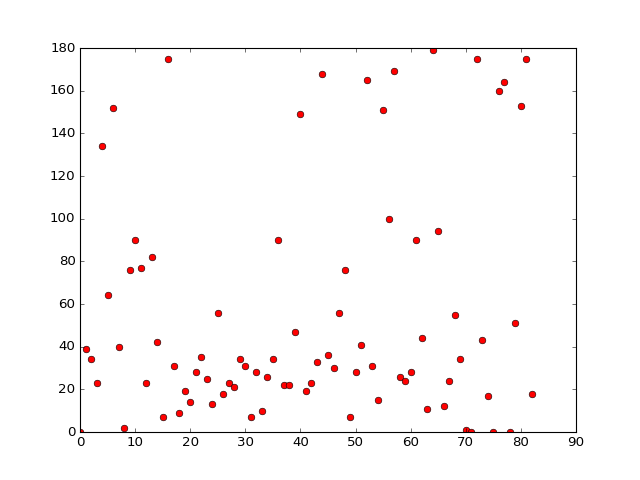

/home/sascwitt/Projects/test/WDs/20160814_1004_1/7/
43.264295411000006
43.0


<IPython.core.display.Javascript object>


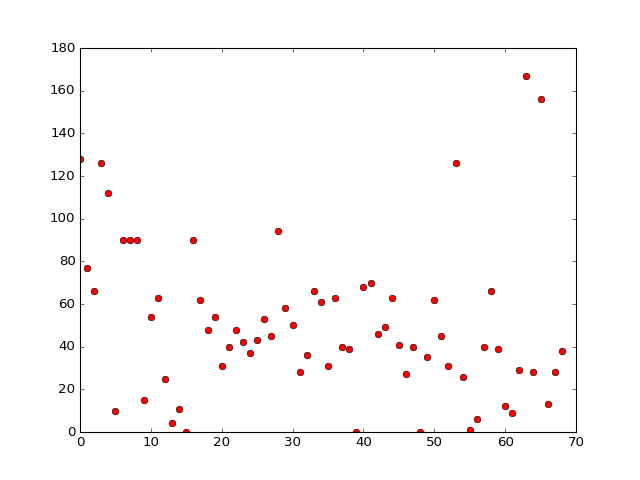

/home/sascwitt/Projects/test/WDs/20160814_1004_1/4/
88.78112476490003
84.0


<IPython.core.display.Javascript object>


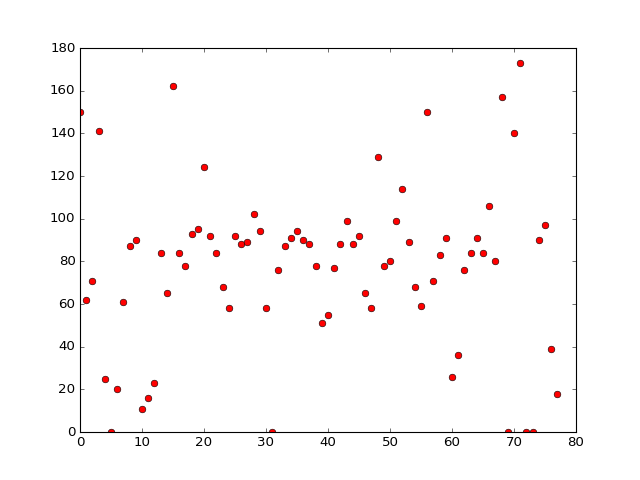

/home/sascwitt/Projects/test/WDs/20160814_1016_1/1/
123.4078245897
100.5


<IPython.core.display.Javascript object>


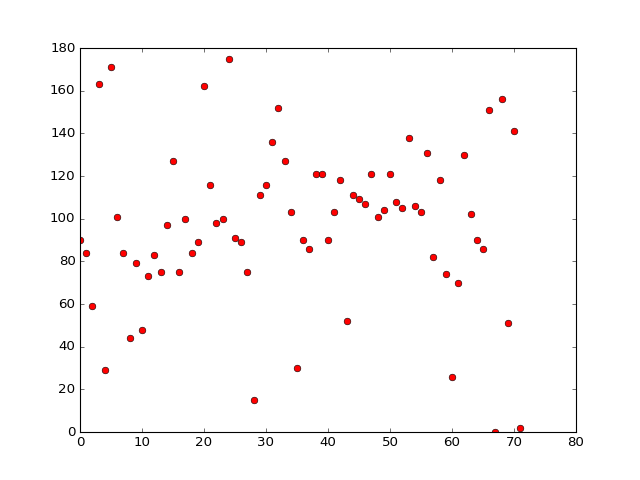

/home/sascwitt/Projects/test/WDs/20160814_1016_1/0/
173.77417093557
90.0


<IPython.core.display.Javascript object>


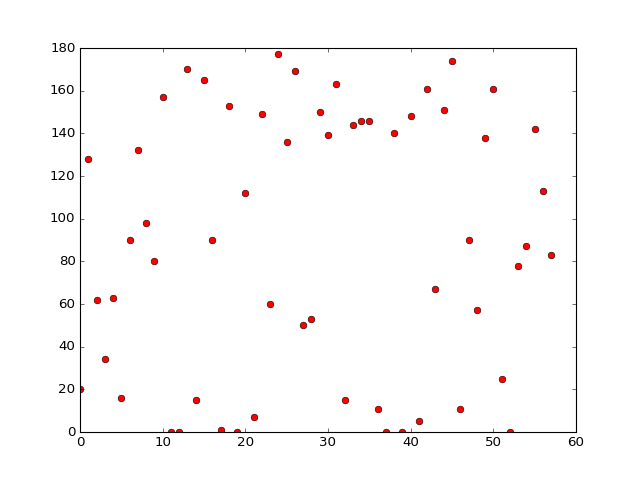

/home/sascwitt/Projects/test/WDs/20160814_1002_1/27/
37.0730733173
40.0


<IPython.core.display.Javascript object>


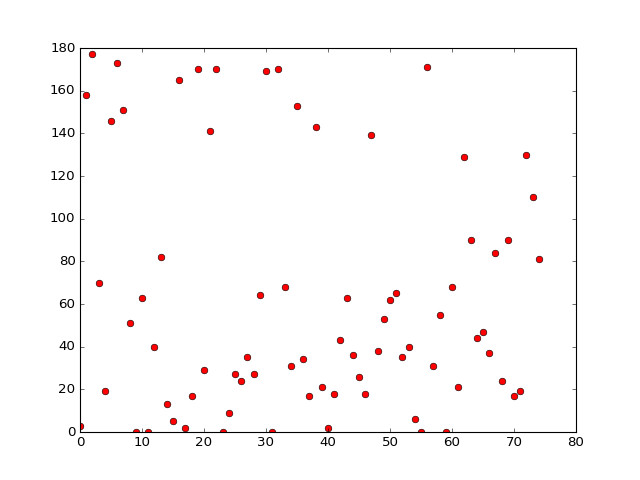

/home/sascwitt/Projects/test/WDs/20160814_1002_1/26/
17.4747742563
48.5


<IPython.core.display.Javascript object>


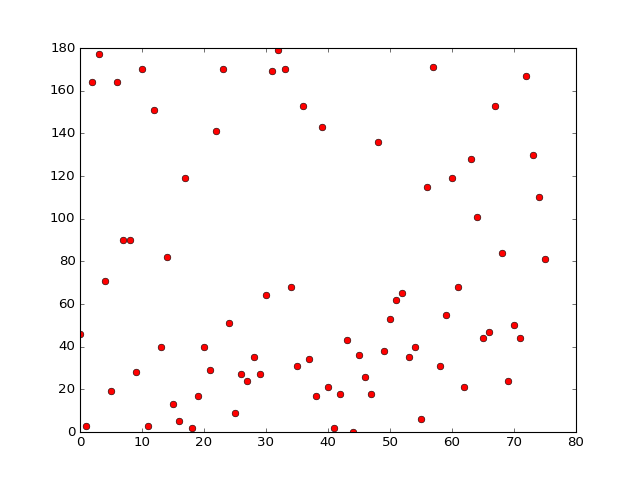

/home/sascwitt/Projects/test/WDs/20160814_1002_1/14/
32.5350671579
41.5


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


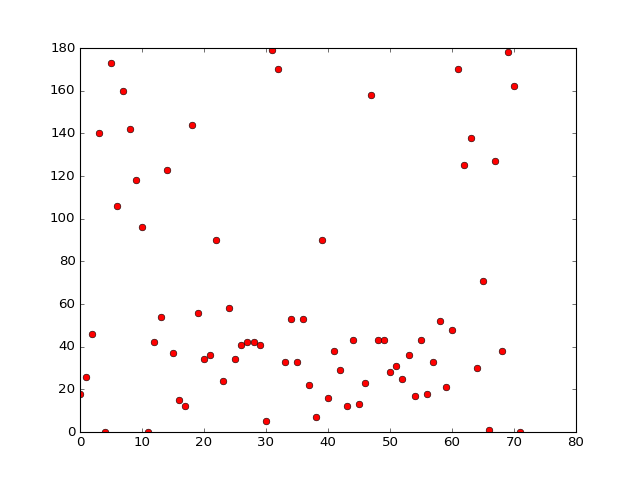

/home/sascwitt/Projects/test/WDs/20160814_1002_1/24/
21.4477363271
32.0


<IPython.core.display.Javascript object>


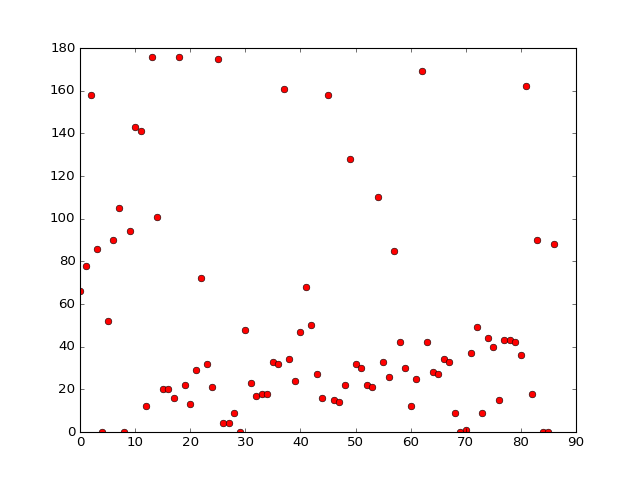

/home/sascwitt/Projects/test/WDs/20160814_1005_1/7/
86.36704926049998
88.0


<IPython.core.display.Javascript object>


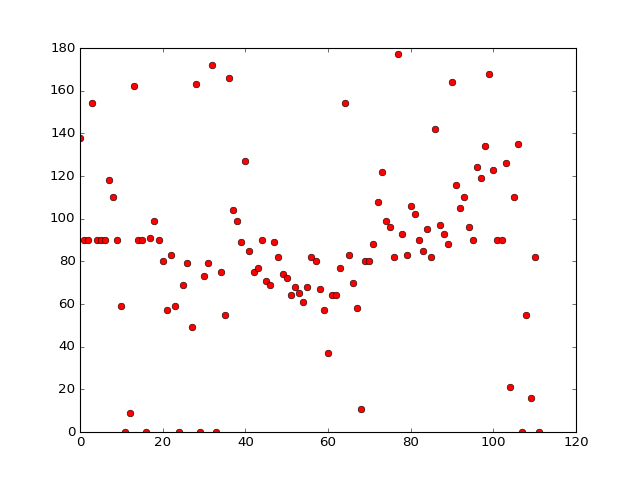

/home/sascwitt/Projects/test/WDs/20160814_1003_1/1/
30.3236068625
45.0


<IPython.core.display.Javascript object>


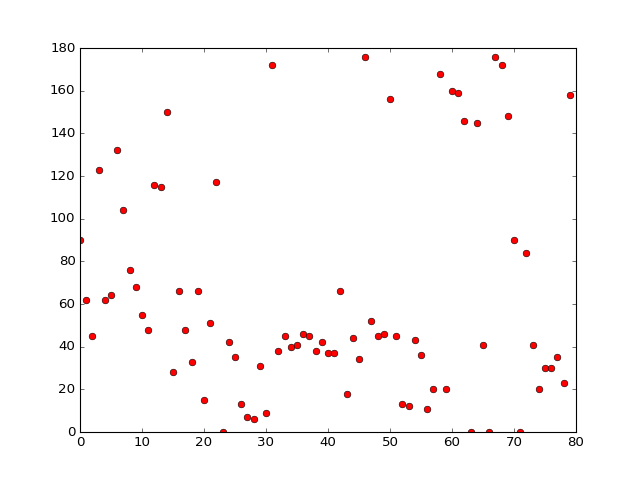

/home/sascwitt/Projects/test/WDs/20160814_1003_1/21/
70.615484321
67.0


<IPython.core.display.Javascript object>


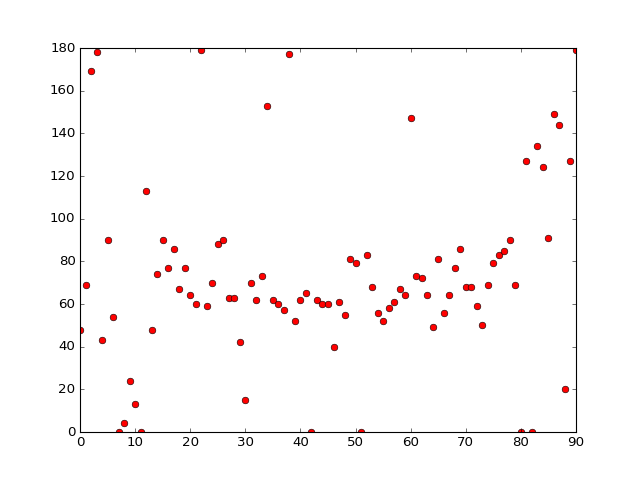

/home/sascwitt/Projects/test/WDs/20160814_1008_1/12/
33.38851357600001
47.0


<IPython.core.display.Javascript object>


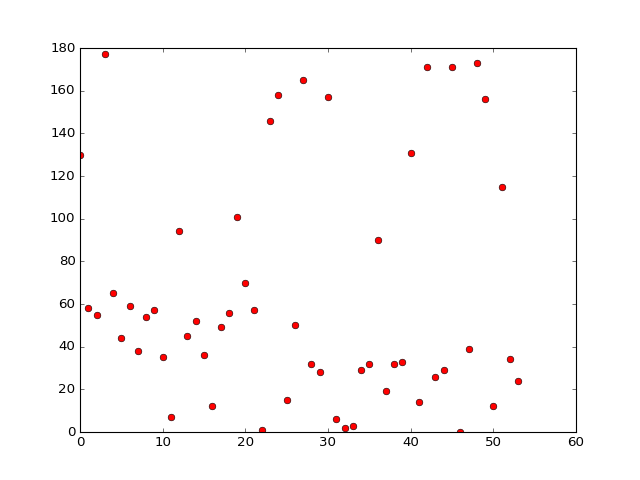

/home/sascwitt/Projects/test/WDs/20160814_1003_1/9/
50.19442890799999
43.0


<IPython.core.display.Javascript object>


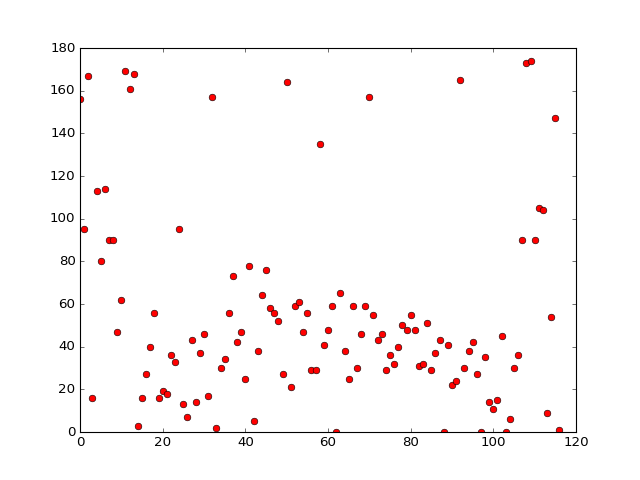

/home/sascwitt/Projects/test/WDs/20160814_1008_1/0/
14.5344550805
54.0


<IPython.core.display.Javascript object>


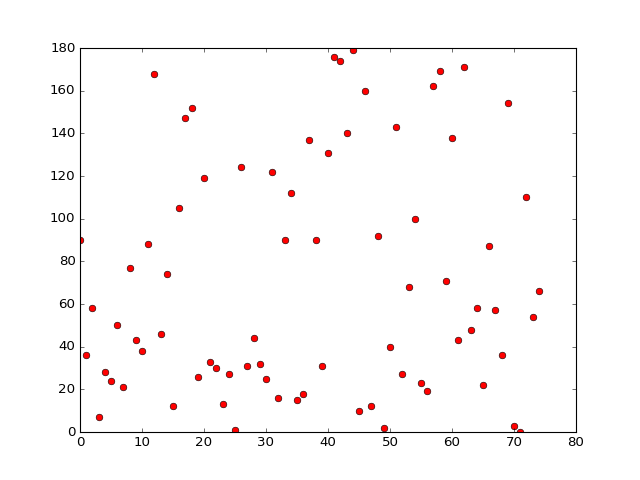

/home/sascwitt/Projects/test/WDs/20160814_1004_1/8/
85.91438321999999
87.5


<IPython.core.display.Javascript object>


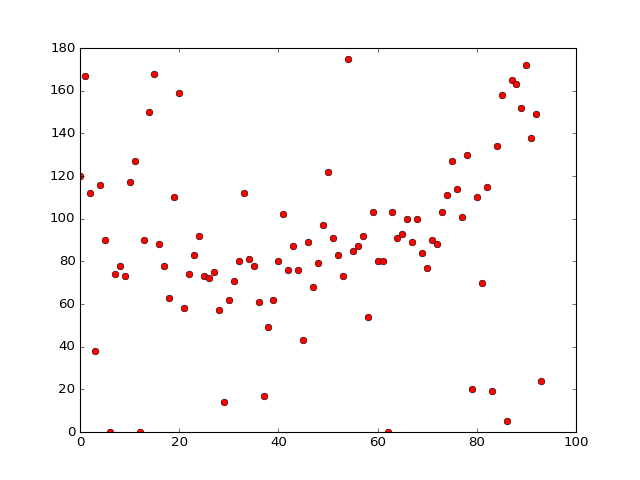

/home/sascwitt/Projects/test/WDs/20160814_1009_1/2/
4.96974072811
90.0


<IPython.core.display.Javascript object>


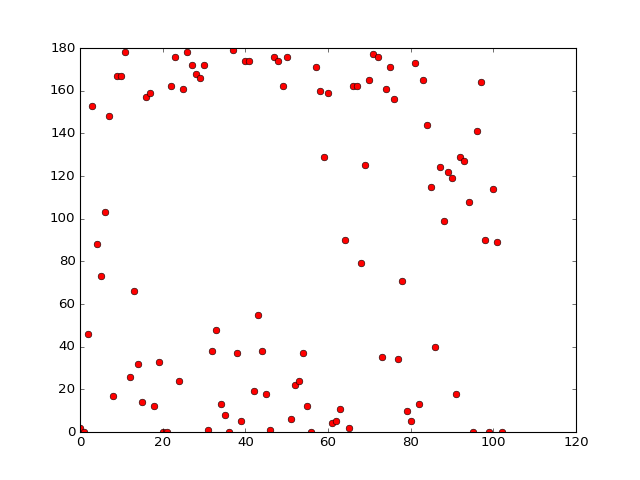

/home/sascwitt/Projects/test/WDs/20160814_1003_1/2/
13.4957332808
33.0


<IPython.core.display.Javascript object>


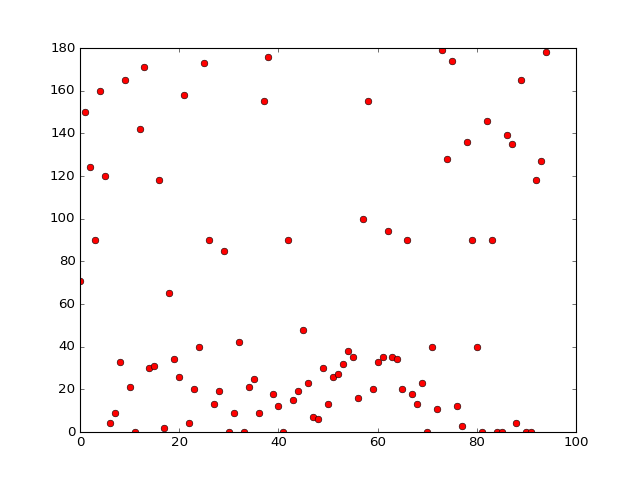

/home/sascwitt/Projects/test/WDs/20160814_1002_1/21/
38.9909940425
49.0


<IPython.core.display.Javascript object>


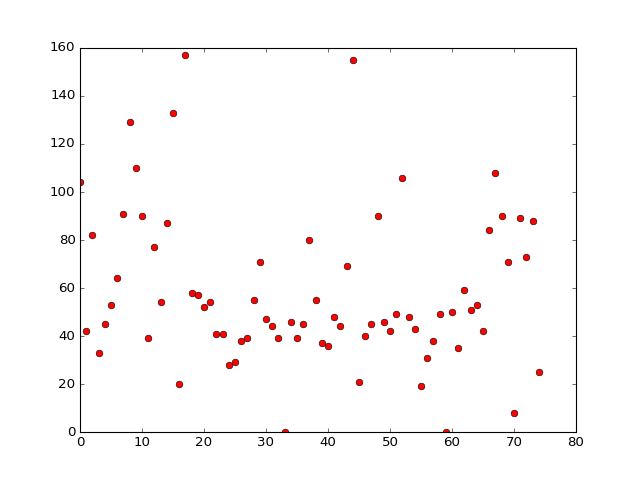

/home/sascwitt/Projects/test/WDs/20160814_1003_1/6/
66.80140948600001
64.0


<IPython.core.display.Javascript object>


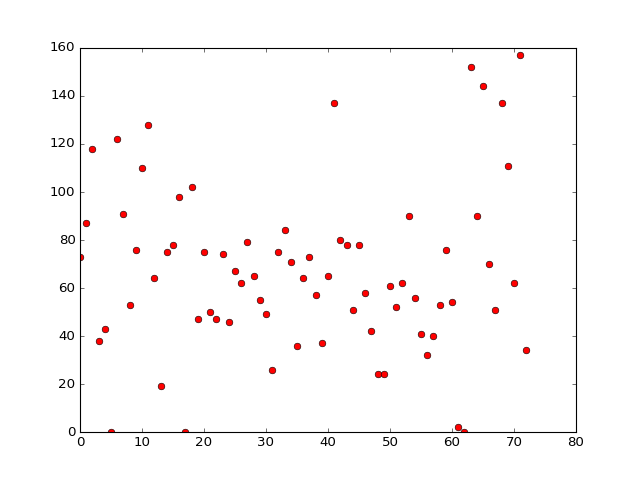

/home/sascwitt/Projects/test/WDs/20160814_1002_1/2/
0.0
90.0


<IPython.core.display.Javascript object>


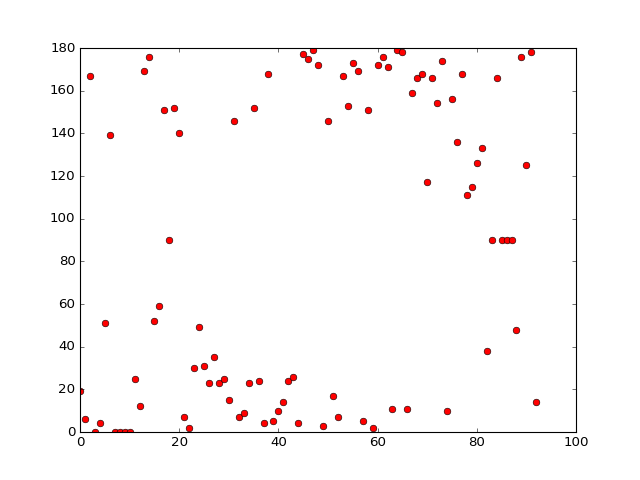

/home/sascwitt/Projects/test/WDs/20160814_1003_1/15/
83.4180553448
79.0


<IPython.core.display.Javascript object>


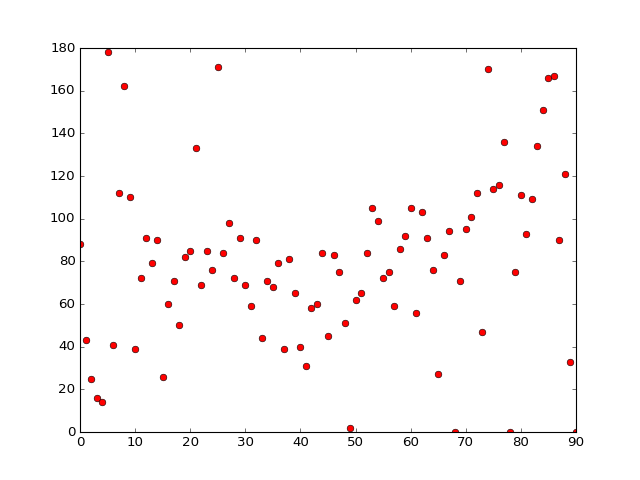

/home/sascwitt/Projects/test/WDs/20160814_1008_1/8/
34.548367056
48.0


<IPython.core.display.Javascript object>


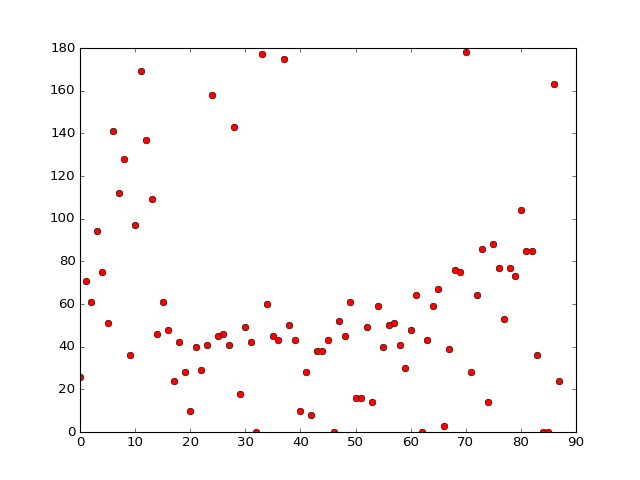

/home/sascwitt/Projects/test/WDs/20160814_1008_1/22/
179.04515874612798
88.0


<IPython.core.display.Javascript object>


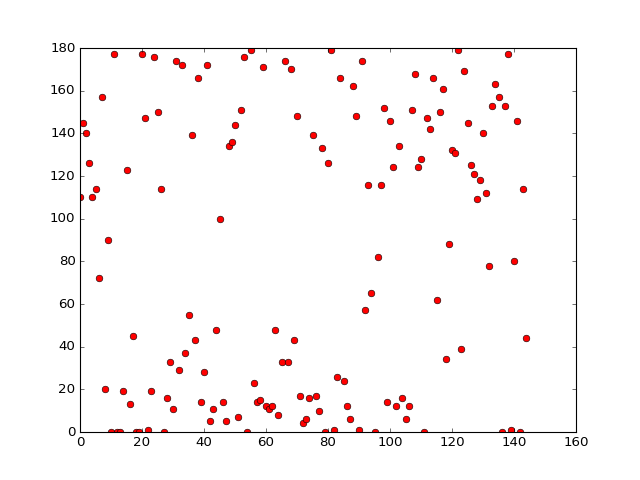

/home/sascwitt/Projects/test/WDs/20160814_1011_1/2/
9.03948280336
90.0


<IPython.core.display.Javascript object>


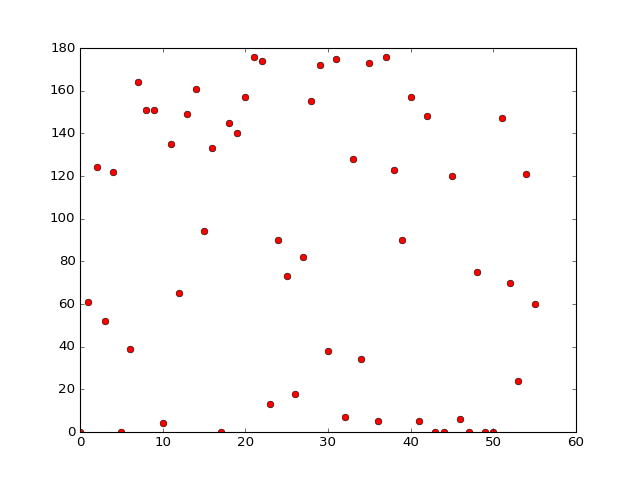

/home/sascwitt/Projects/test/WDs/20160814_1003_1/10/
85.76360520089997
90.0


<IPython.core.display.Javascript object>


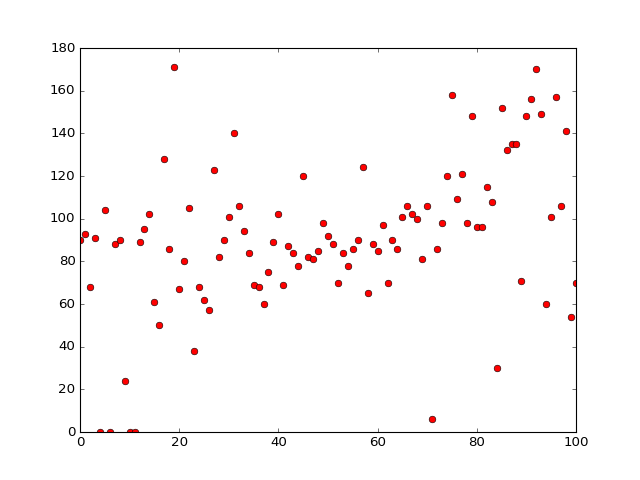

/home/sascwitt/Projects/test/WDs/20160814_1007_1/6/
31.5042667192
38.0


<IPython.core.display.Javascript object>


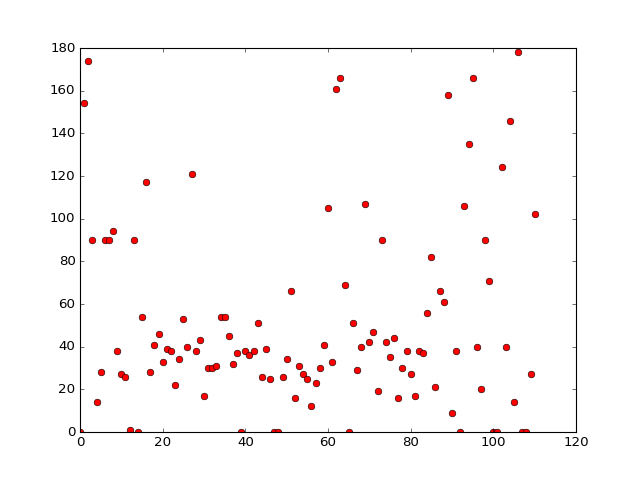

/home/sascwitt/Projects/test/WDs/20160814_1003_1/11/
33.97654403600001
42.5


<IPython.core.display.Javascript object>


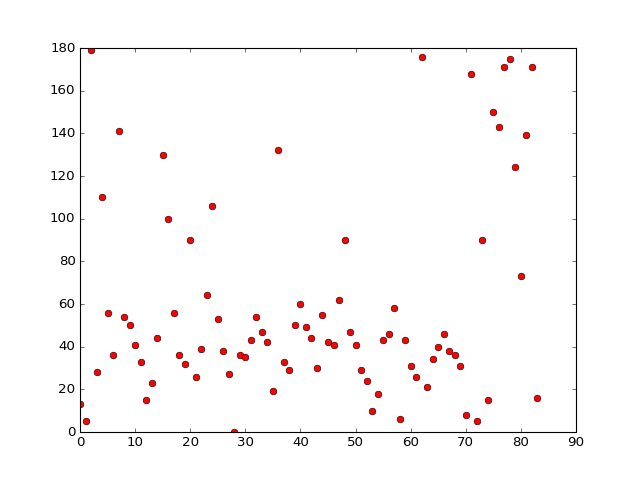

/home/sascwitt/Projects/test/WDs/20160814_1001_1/5/
32.938690543
37.0


<IPython.core.display.Javascript object>


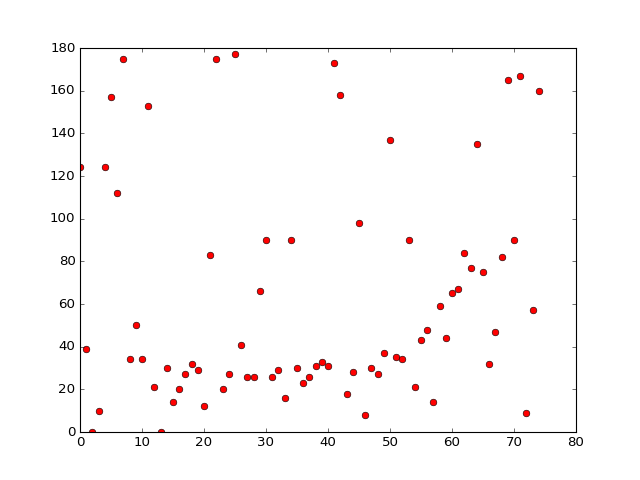

/home/sascwitt/Projects/test/WDs/20160814_1008_1/2/
0.881403996582
81.5


<IPython.core.display.Javascript object>


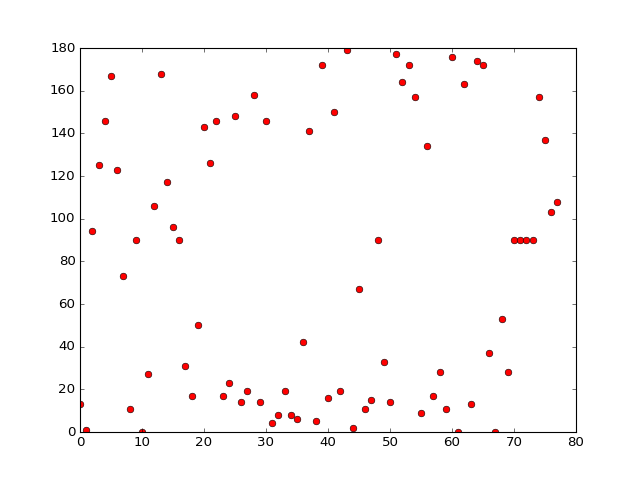

/home/sascwitt/Projects/test/WDs/20160814_1002_1/7/
17.1027289691
29.0


<IPython.core.display.Javascript object>


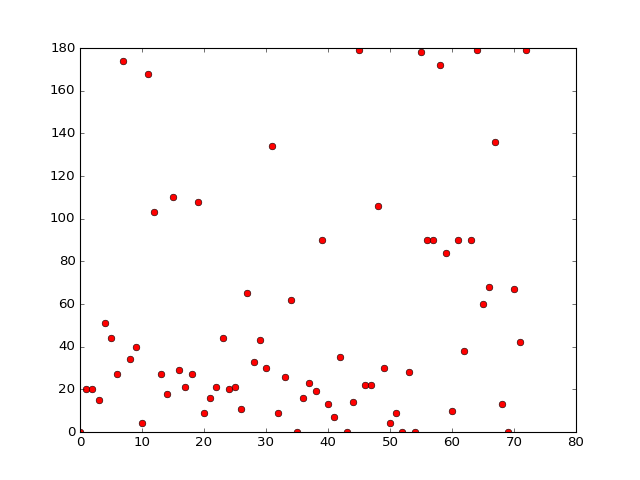

/home/sascwitt/Projects/test/WDs/20160814_1007_1/4/
41.3915311474
47.5


<IPython.core.display.Javascript object>


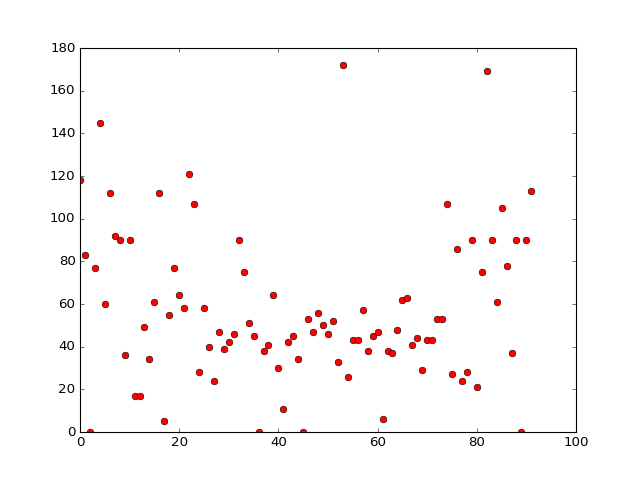

/home/sascwitt/Projects/test/WDs/20160814_1002_1/13/
2.72631099391
23.5


<IPython.core.display.Javascript object>


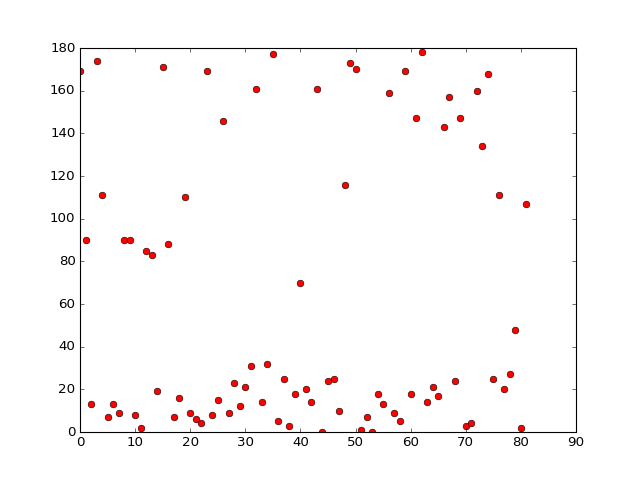

/home/sascwitt/Projects/test/WDs/20160814_1002_1/0/
47.489552922
36.0


<IPython.core.display.Javascript object>


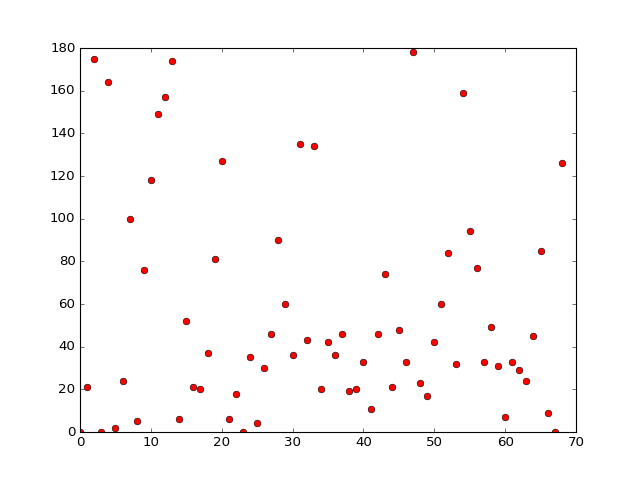

/home/sascwitt/Projects/test/WDs/20160814_1008_1/10/
26.2413496522
53.0


<IPython.core.display.Javascript object>


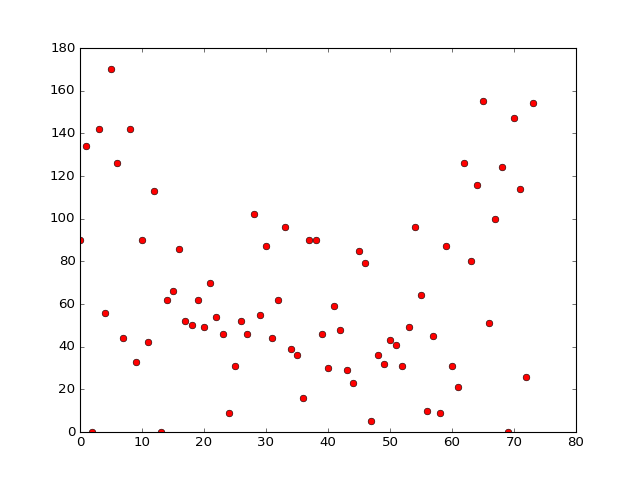

/home/sascwitt/Projects/test/WDs/20160814_1007_1/12/
13.799485396
56.0


<IPython.core.display.Javascript object>


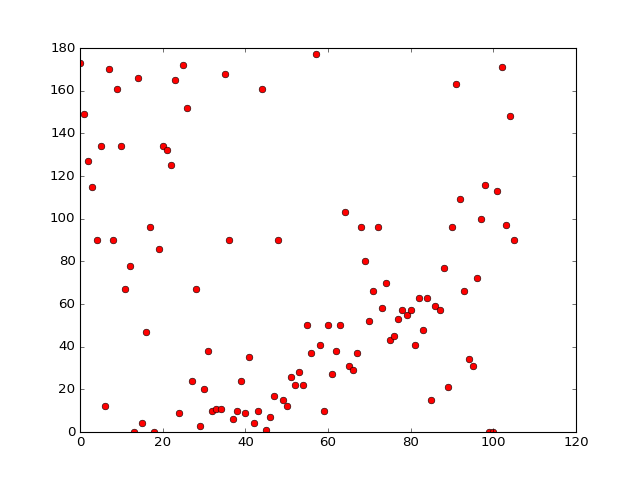

/home/sascwitt/Projects/test/WDs/20160814_1007_1/10/
44.3969088056
54.0


<IPython.core.display.Javascript object>


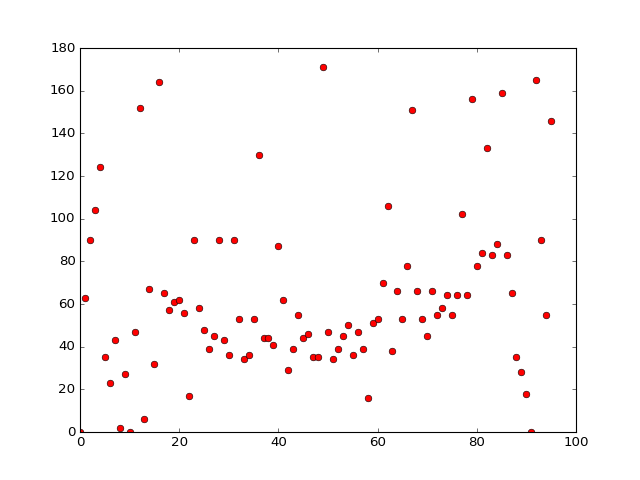

/home/sascwitt/Projects/test/WDs/20160814_1008_1/4/
0.0
72.0


<IPython.core.display.Javascript object>


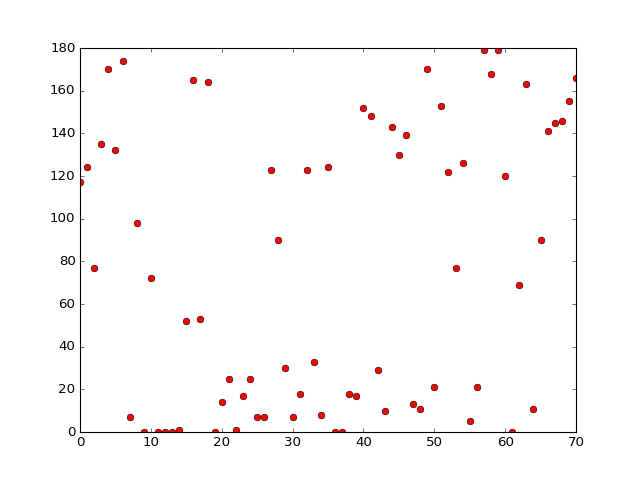

/home/sascwitt/Projects/test/WDs/20160814_1007_1/9/
20.6589100633
37.0


<IPython.core.display.Javascript object>


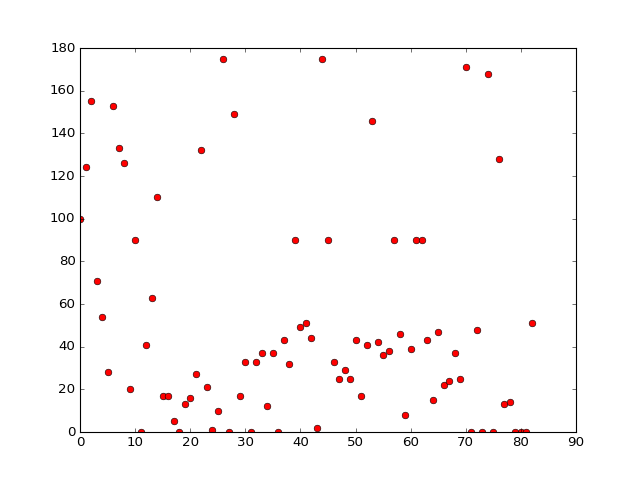

/home/sascwitt/Projects/test/WDs/20160814_1007_1/2/
5.61758059013
30.0


<IPython.core.display.Javascript object>


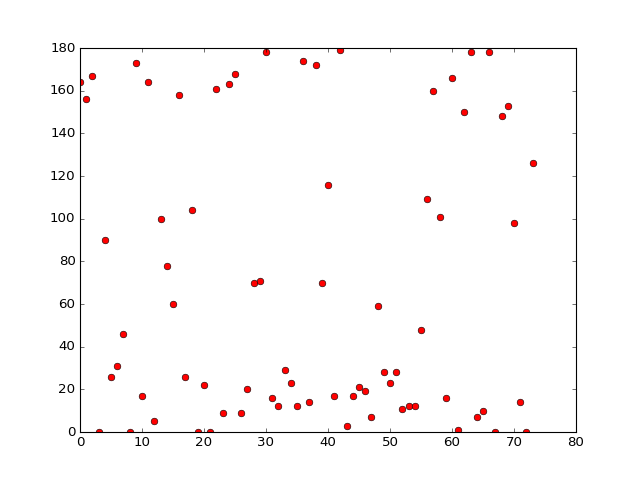

/home/sascwitt/Projects/test/WDs/20160814_1004_1/6/
170.90972307918003
144.0


<IPython.core.display.Javascript object>


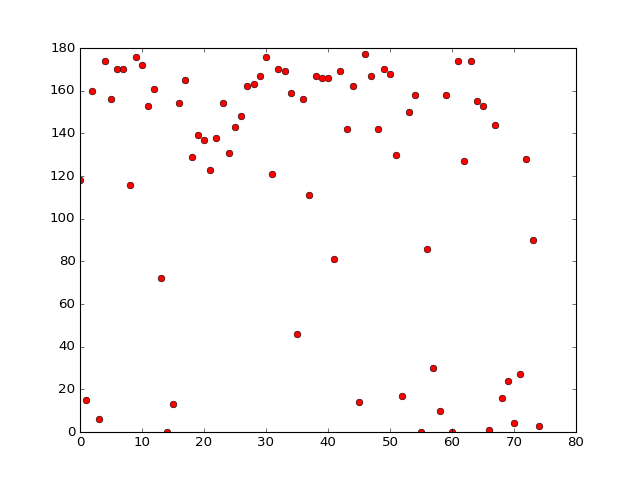

/home/sascwitt/Projects/test/WDs/20160814_1003_1/8/
14.9950791292
29.0


<IPython.core.display.Javascript object>


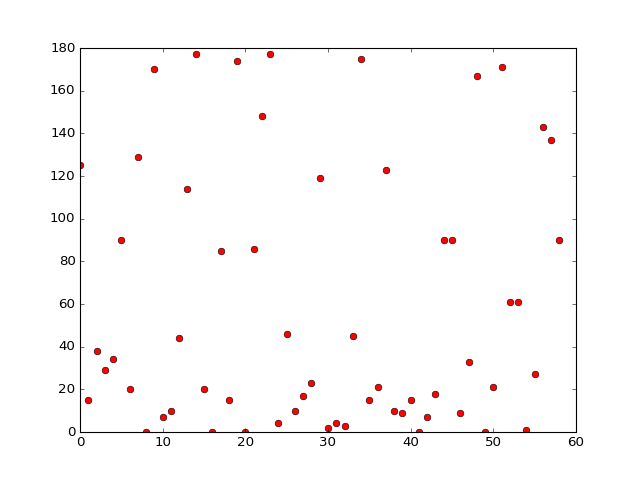

/home/sascwitt/Projects/test/WDs/20160814_1007_1/13/
17.1027289691
41.0


<IPython.core.display.Javascript object>


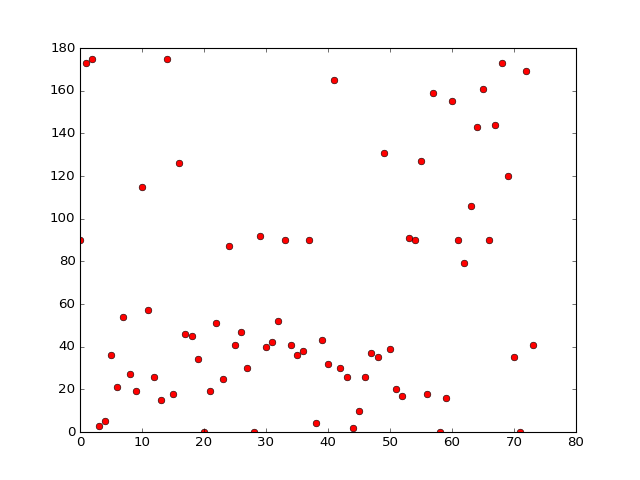

/home/sascwitt/Projects/test/WDs/20160814_1002_1/4/
20.3764352138
29.0


<IPython.core.display.Javascript object>


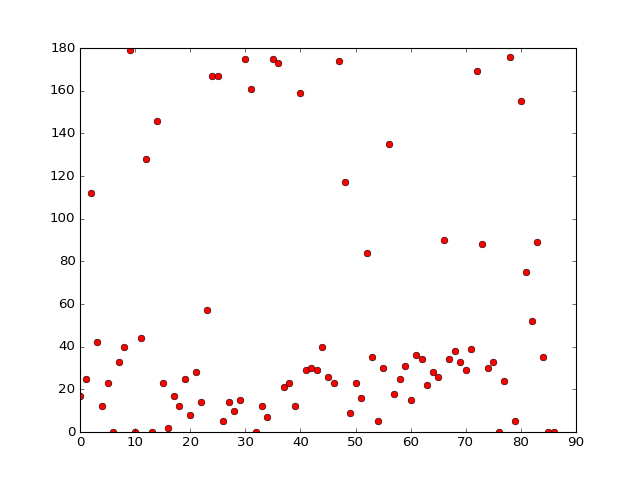

/home/sascwitt/Projects/test/WDs/20160814_1010_1/0/
13.2405199152
32.5


<IPython.core.display.Javascript object>


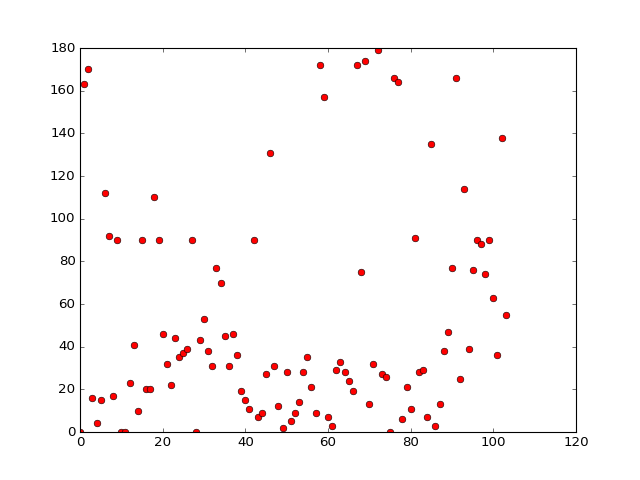

/home/sascwitt/Projects/test/WDs/20160814_1010_1/1/
33.9435870198
50.0


<IPython.core.display.Javascript object>


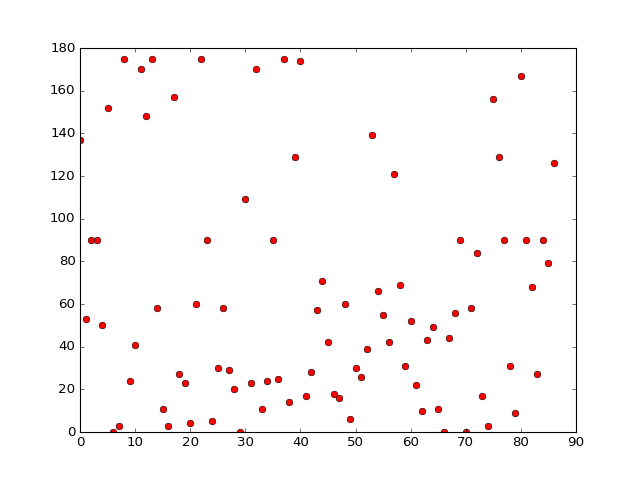

/home/sascwitt/Projects/test/WDs/20160814_1008_1/13/
0.0
34.0


<IPython.core.display.Javascript object>


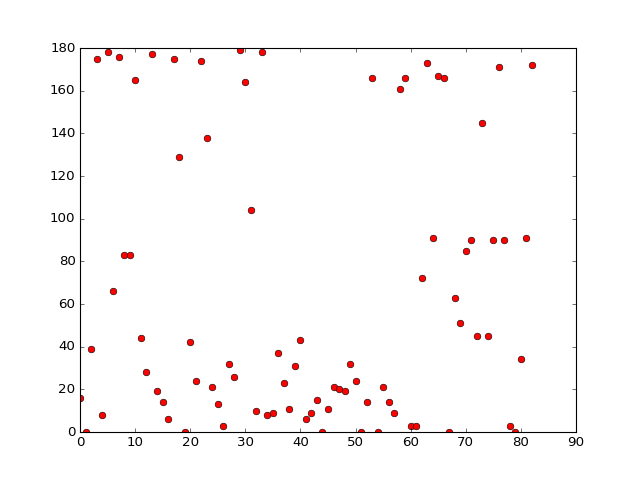

/home/sascwitt/Projects/test/WDs/20160814_1008_1/3/
33.690067526
39.0


<IPython.core.display.Javascript object>


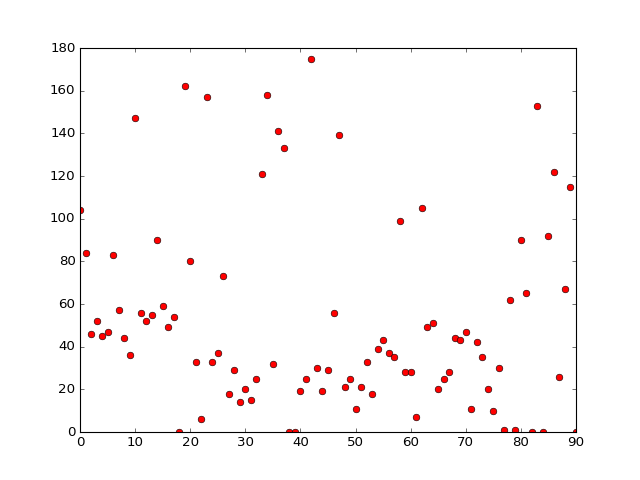

/home/sascwitt/Projects/test/WDs/20160814_1002_1/18/
32.2756443146
44.0


<IPython.core.display.Javascript object>


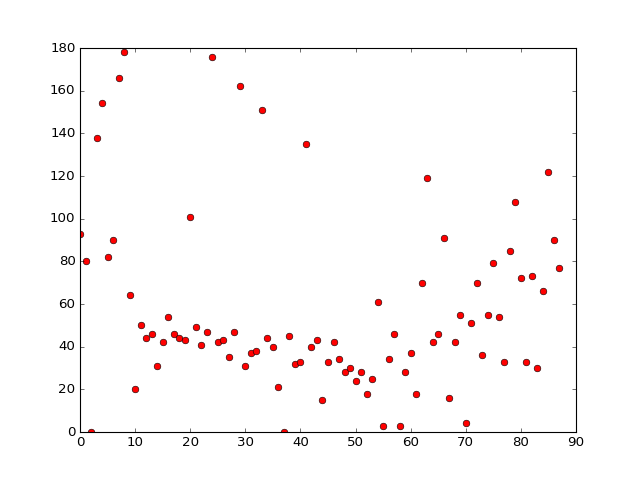

/home/sascwitt/Projects/test/WDs/20160814_1009_1/5/
24.5671713206
37.5


<IPython.core.display.Javascript object>


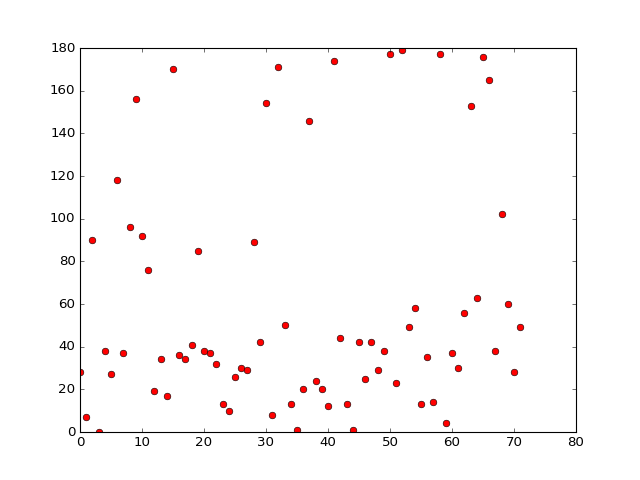

/home/sascwitt/Projects/test/WDs/20160814_1007_1/8/
21.4767909795
38.0


<IPython.core.display.Javascript object>


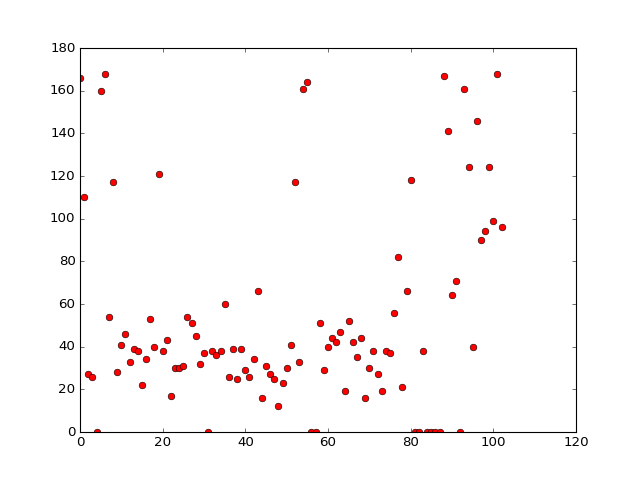

/home/sascwitt/Projects/test/WDs/20160814_1003_1/12/
66.21796957700002
69.5


<IPython.core.display.Javascript object>


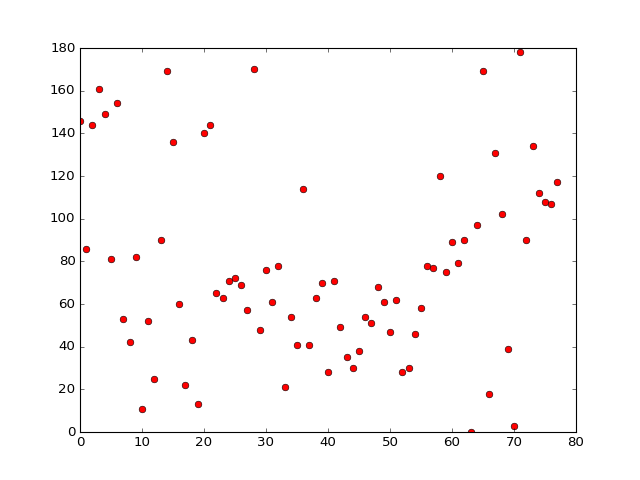

/home/sascwitt/Projects/test/WDs/20160814_1004_1/9/
45.784824603000004
58.0


<IPython.core.display.Javascript object>


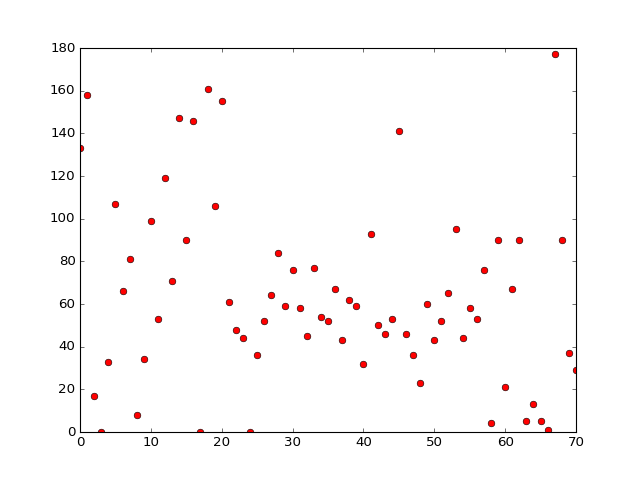

/home/sascwitt/Projects/test/WDs/20160814_1014_1/0/
31.7014296695
45.5


<IPython.core.display.Javascript object>


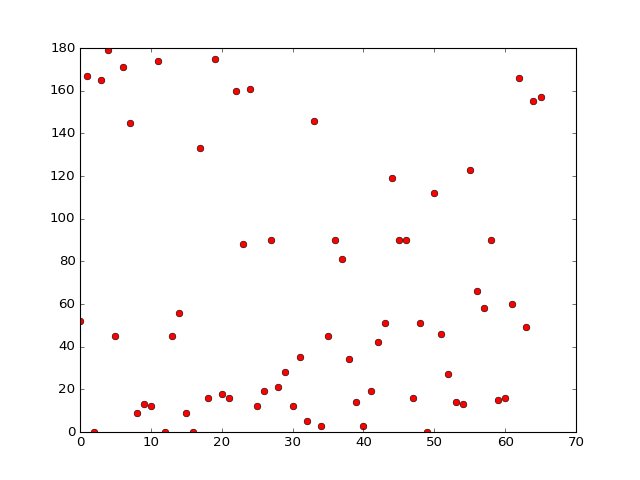

/home/sascwitt/Projects/test/WDs/20160814_1003_1/5/
55.75096699300002
47.0


<IPython.core.display.Javascript object>


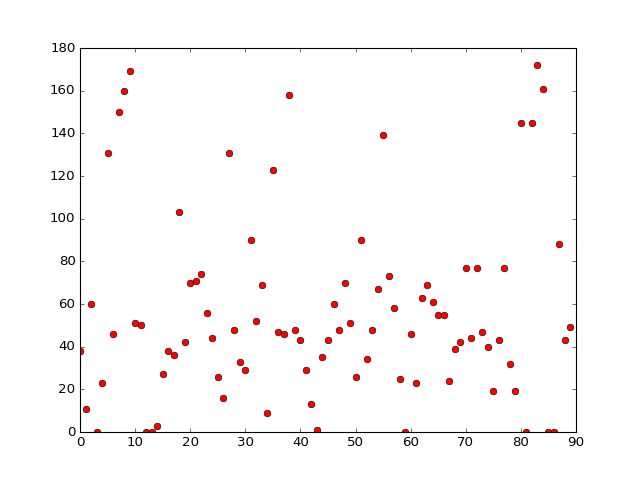

/home/sascwitt/Projects/test/WDs/20160814_1001_1/2/
6.24191434742
39.0


<IPython.core.display.Javascript object>


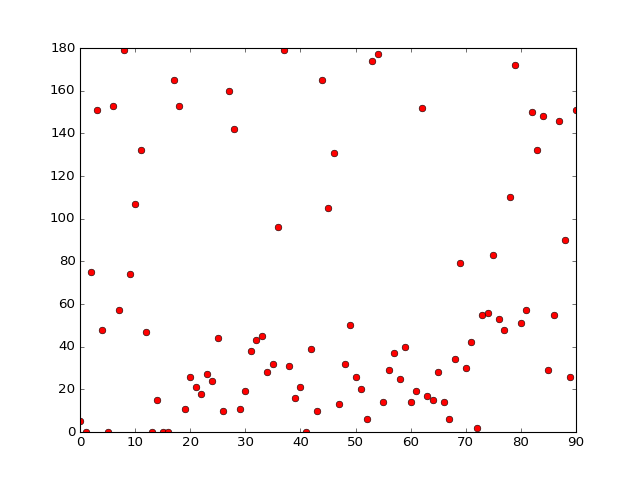

/home/sascwitt/Projects/test/WDs/20160814_1003_1/13/
53.972626614999996
51.0


<IPython.core.display.Javascript object>


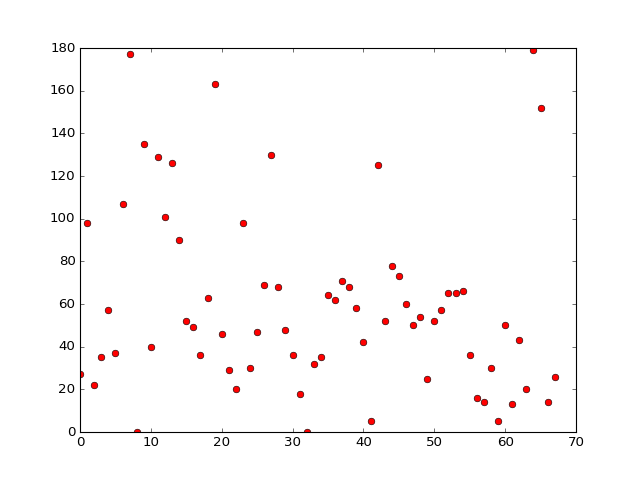

/home/sascwitt/Projects/test/WDs/20160814_1005_1/6/
45.507029061
40.5


<IPython.core.display.Javascript object>


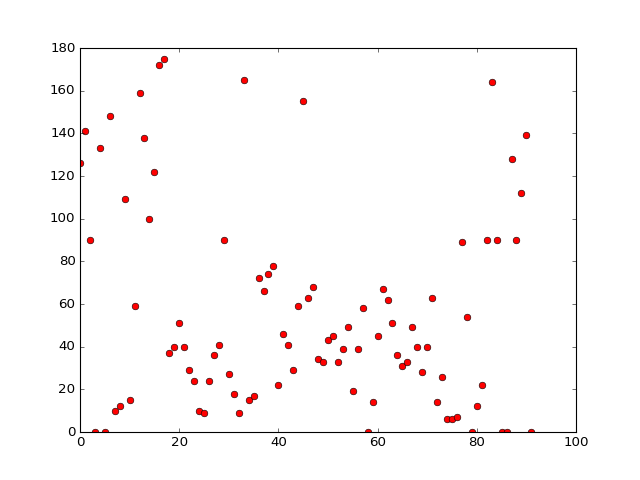

/home/sascwitt/Projects/test/WDs/20160814_1009_1/0/
22.2490236572
40.0


<IPython.core.display.Javascript object>


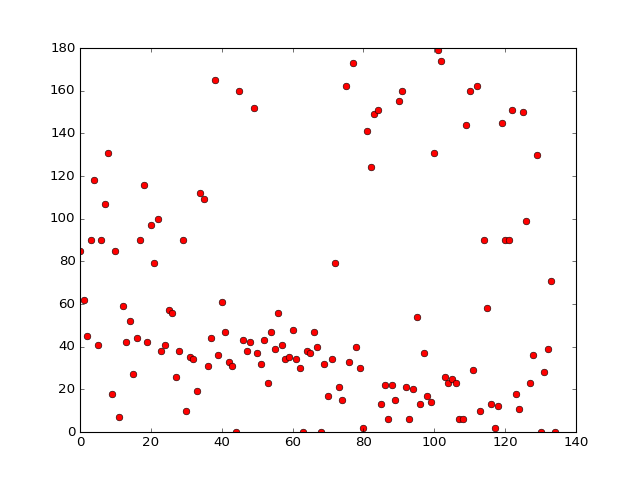

/home/sascwitt/Projects/test/WDs/20160814_1002_1/22/
18.7586503478
41.0


<IPython.core.display.Javascript object>


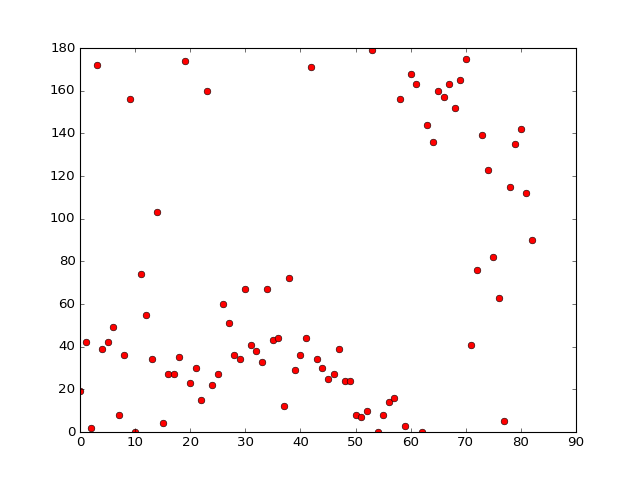

/home/sascwitt/Projects/test/WDs/20160814_1016_1/4/
59.03624346800001
64.5


<IPython.core.display.Javascript object>


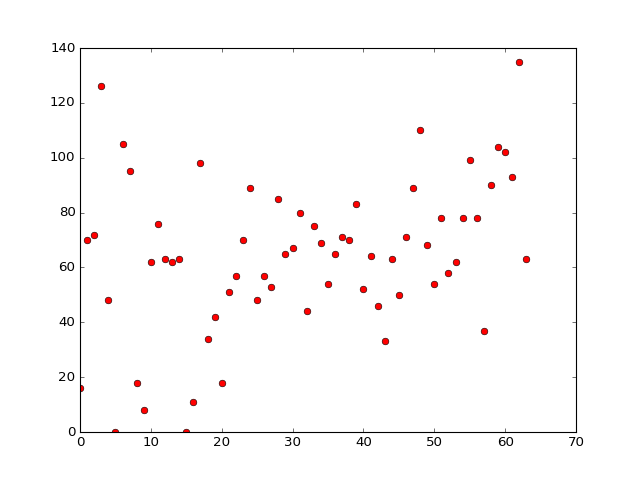

/home/sascwitt/Projects/test/WDs/20160814_1008_1/7/
20.2248594312
65.0


<IPython.core.display.Javascript object>


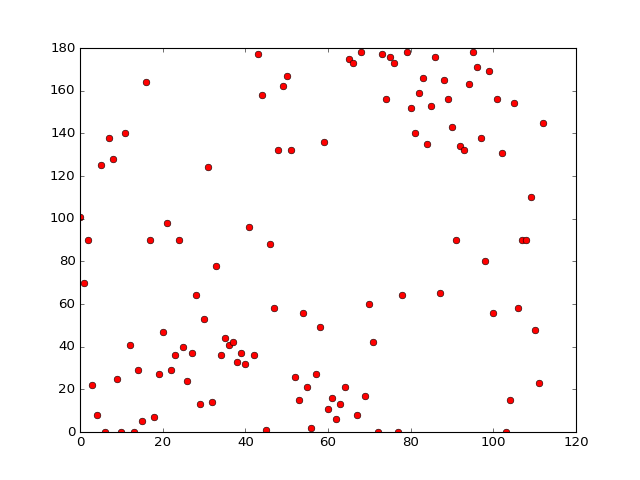

/home/sascwitt/Projects/test/WDs/20160814_1007_1/5/
16.2940474566
43.0


<IPython.core.display.Javascript object>


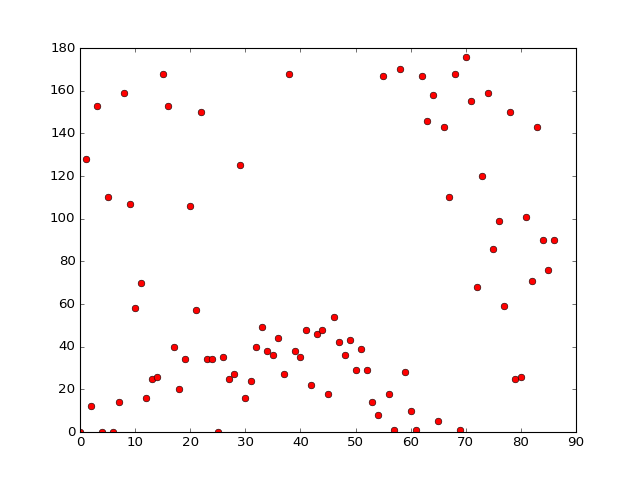

/home/sascwitt/Projects/test/WDs/20160814_1002_1/12/
22.619864948
42.0


<IPython.core.display.Javascript object>


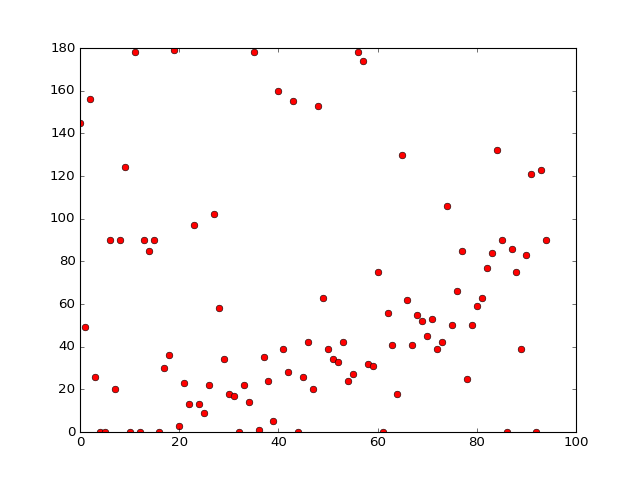

/home/sascwitt/Projects/test/WDs/20160814_1008_1/23/
171.25383773744
118.5


<IPython.core.display.Javascript object>


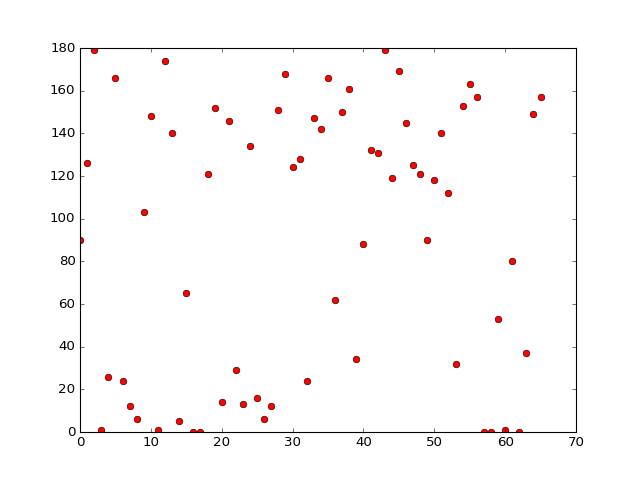

/home/sascwitt/Projects/test/WDs/20160814_1003_1/22/
53.972626614999996
40.0


<IPython.core.display.Javascript object>


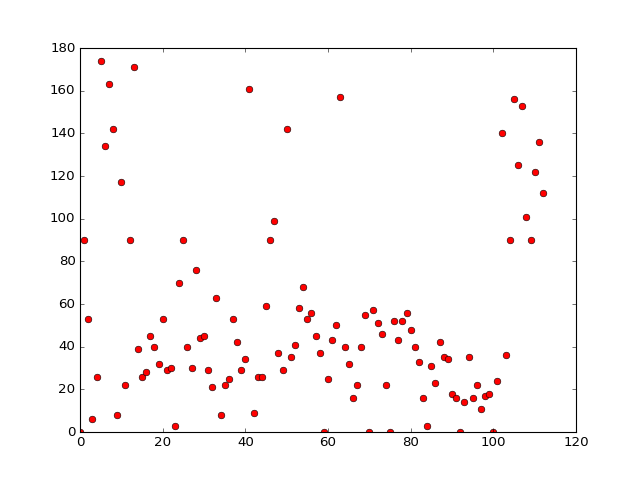

/home/sascwitt/Projects/test/WDs/20160814_1004_1/3/
23.87528085400001
32.0


<IPython.core.display.Javascript object>


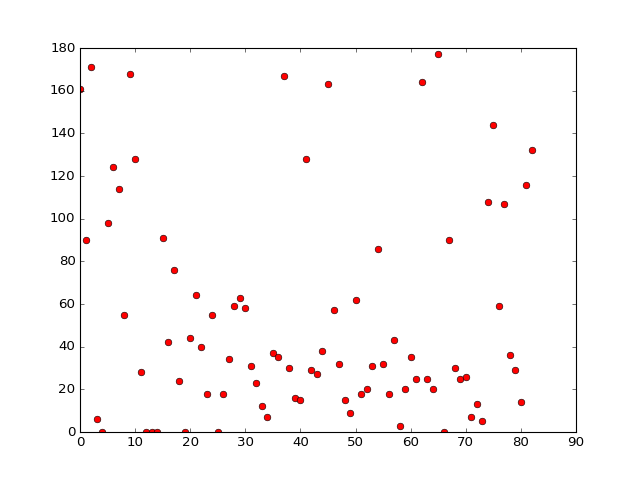

/home/sascwitt/Projects/test/WDs/20160814_1011_1/4/
3.65222278031
86.5


<IPython.core.display.Javascript object>


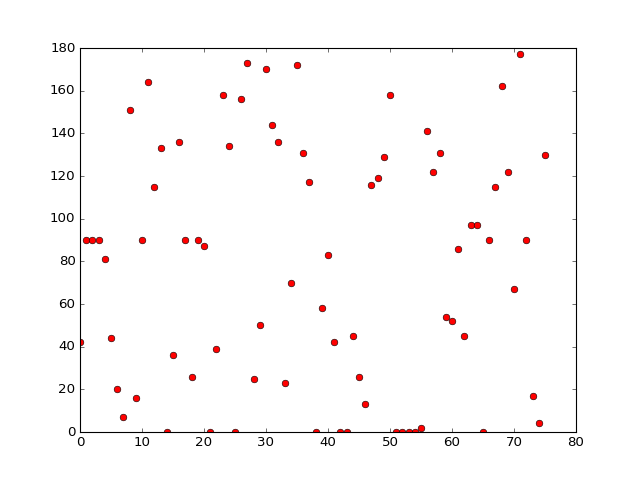

/home/sascwitt/Projects/test/WDs/20160814_1007_1/15/
11.768288932
33.0


<IPython.core.display.Javascript object>


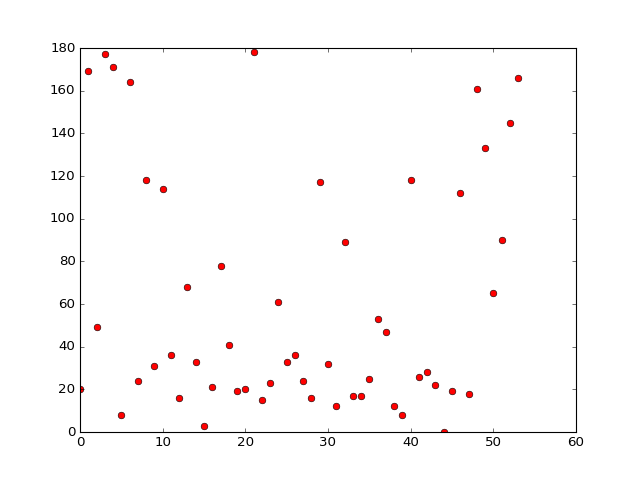

/home/sascwitt/Projects/test/WDs/20160814_1007_1/7/
21.3368592918
38.0


<IPython.core.display.Javascript object>


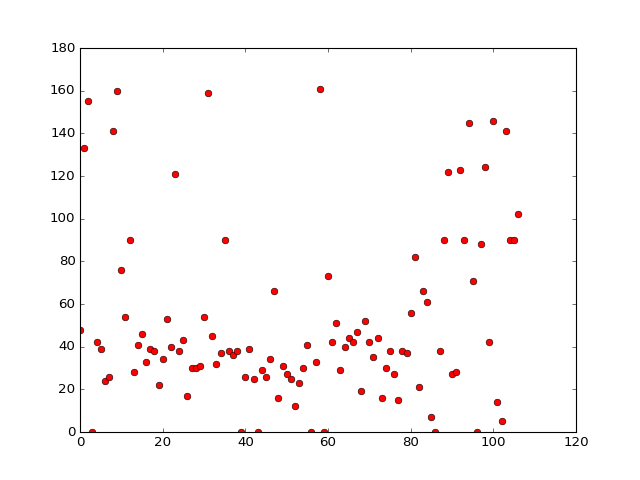

/home/sascwitt/Projects/test/WDs/20160814_1011_1/6/
179.15747573926
90.0


<IPython.core.display.Javascript object>


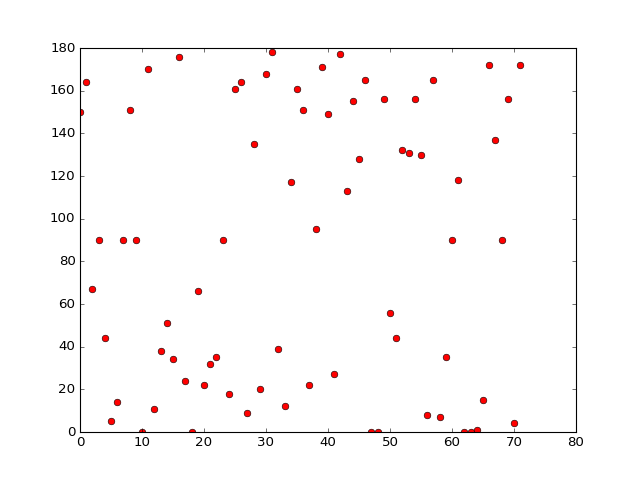

/home/sascwitt/Projects/test/WDs/20160814_1008_1/20/
145.3048464688
139.0


<IPython.core.display.Javascript object>


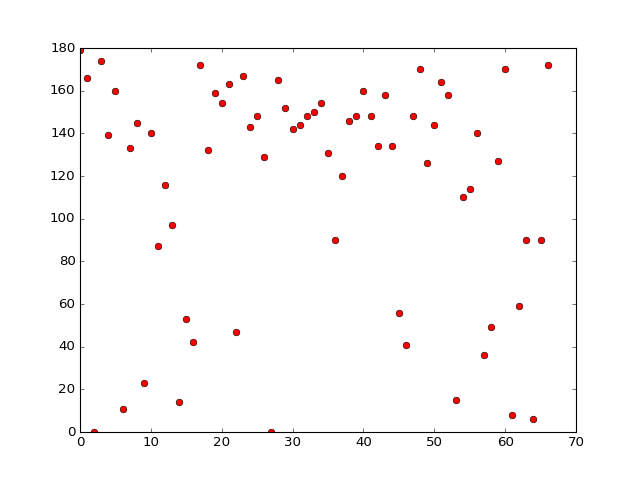

/home/sascwitt/Projects/test/WDs/20160814_1003_1/16/
9.16234704572
35.0


<IPython.core.display.Javascript object>


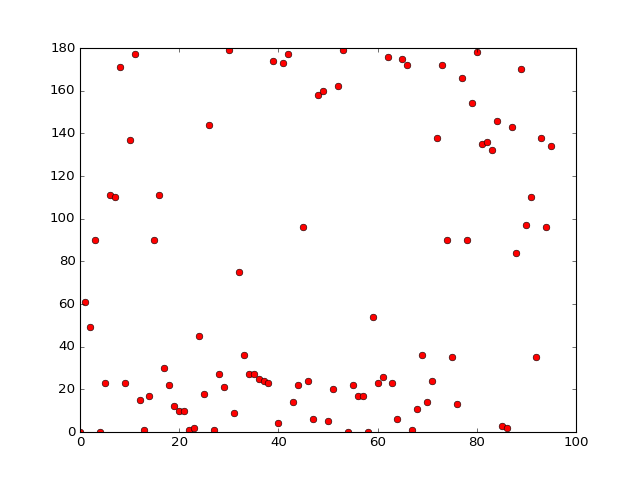

/home/sascwitt/Projects/test/WDs/20160814_1002_1/6/
13.4310288707
30.0


<IPython.core.display.Javascript object>


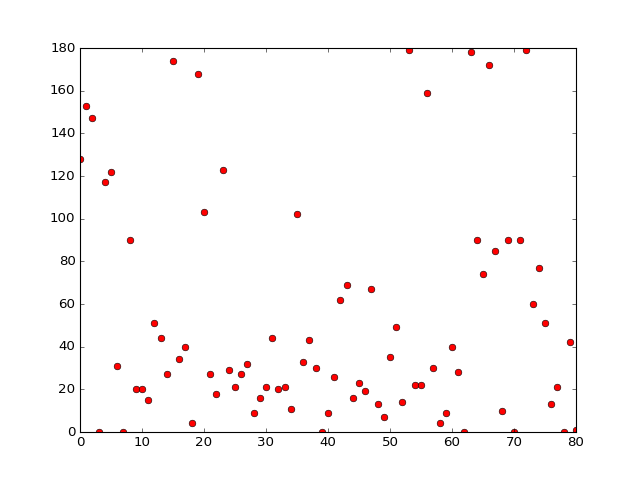

/home/sascwitt/Projects/test/WDs/20160814_1002_1/17/
16.5348378573
33.0


<IPython.core.display.Javascript object>


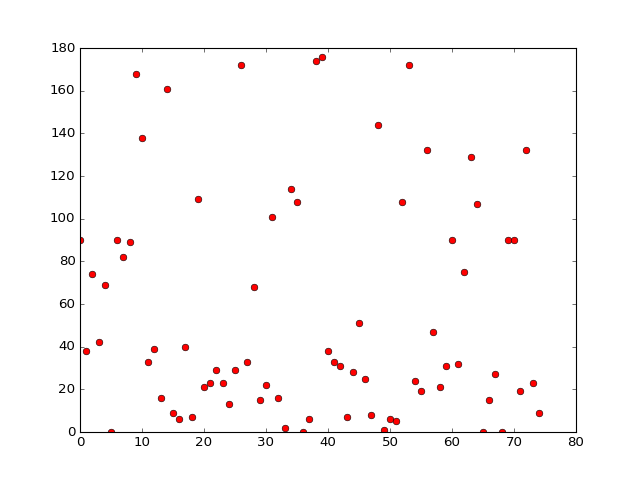

/home/sascwitt/Projects/test/WDs/20160814_1002_1/23/
25.0168934781
33.0


<IPython.core.display.Javascript object>


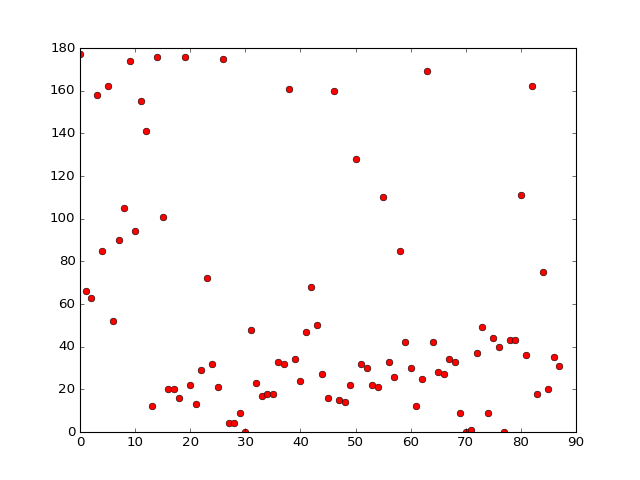

/home/sascwitt/Projects/test/WDs/20160814_1002_1/9/
58.570434385
68.0


<IPython.core.display.Javascript object>


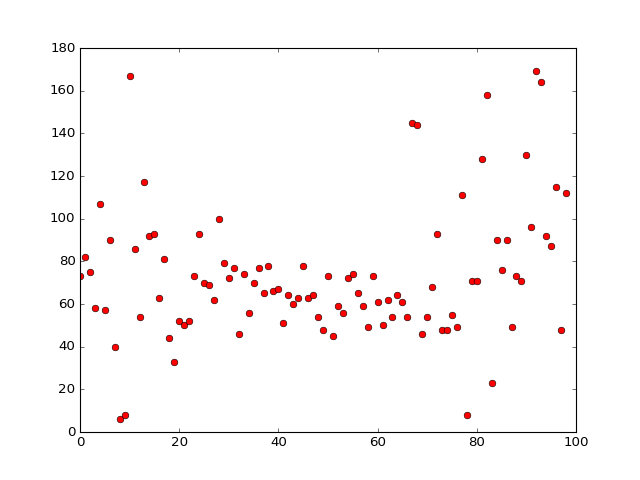

/home/sascwitt/Projects/test/WDs/20160814_1004_1/10/
49.899092454
56.0


<IPython.core.display.Javascript object>


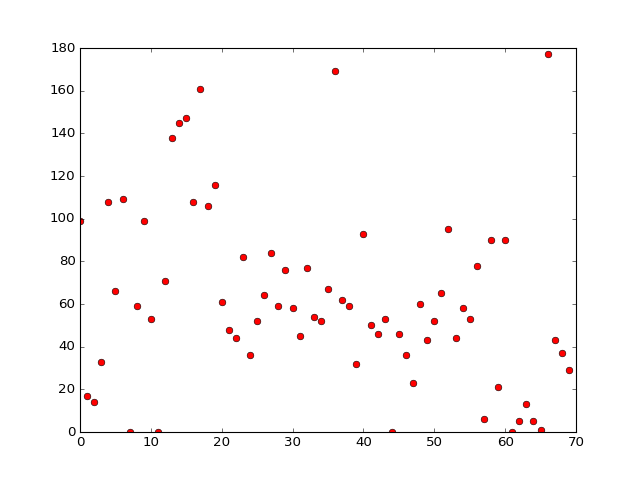

/home/sascwitt/Projects/test/WDs/20160814_1005_1/8/
61.69924423399999
63.5


<IPython.core.display.Javascript object>


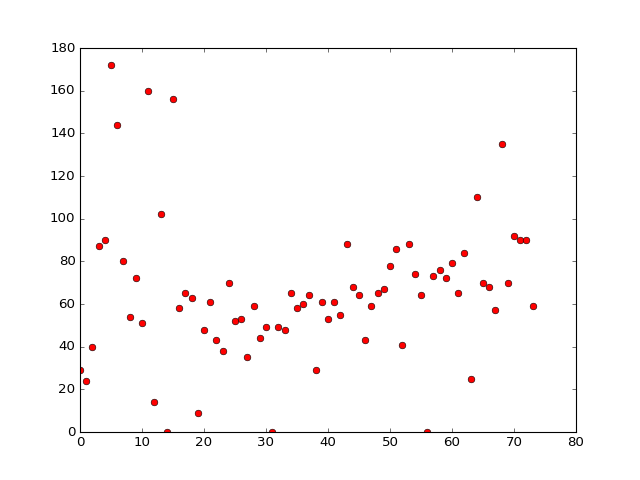

/home/sascwitt/Projects/test/WDs/20160814_1001_1/3/
39.2373671134
52.0


<IPython.core.display.Javascript object>


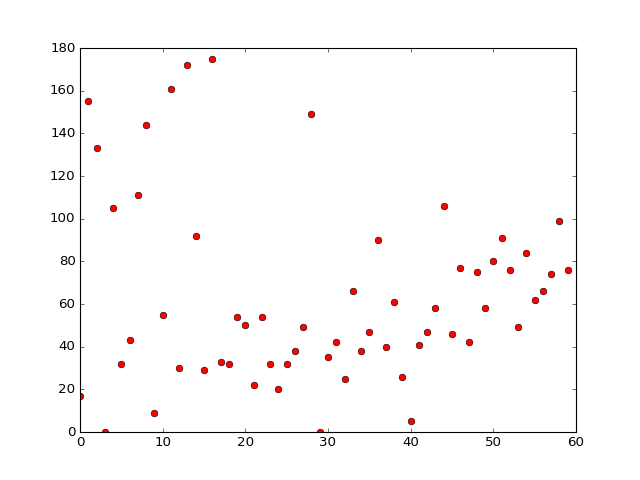

/home/sascwitt/Projects/test/WDs/20160814_1011_1/7/
17.7446716251
90.0


<IPython.core.display.Javascript object>


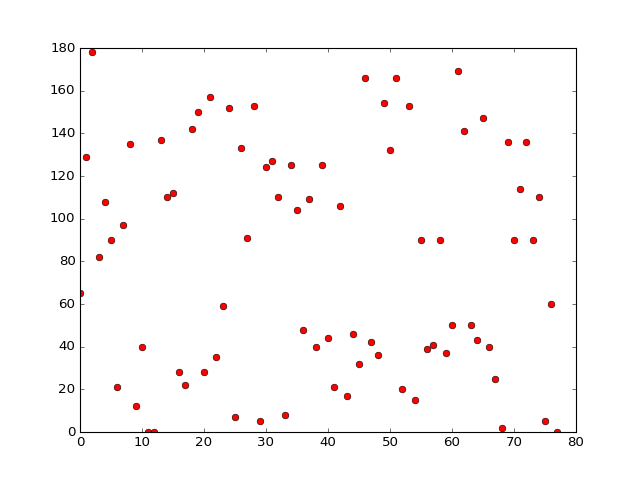

/home/sascwitt/Projects/test/WDs/20160814_1003_1/4/
46.04162667599999
48.0


<IPython.core.display.Javascript object>


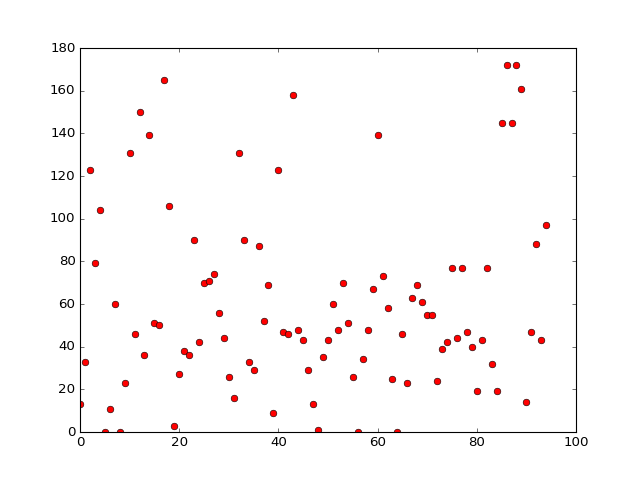

/home/sascwitt/Projects/test/WDs/20160814_1003_1/3/
17.5712587783
34.0


<IPython.core.display.Javascript object>


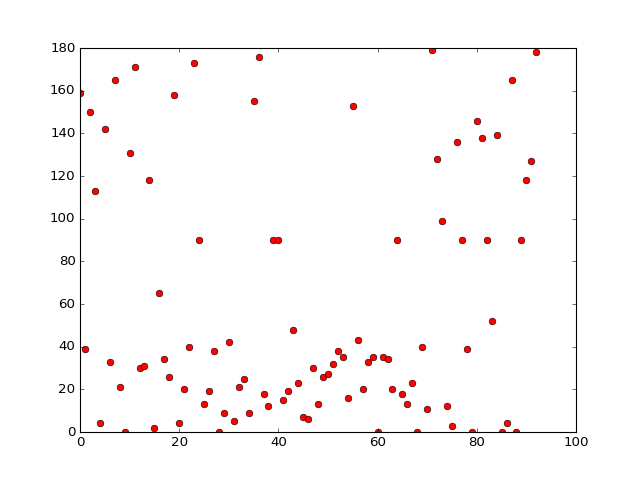

/home/sascwitt/Projects/test/WDs/20160814_1009_1/1/
46.7013546053
42.5


<IPython.core.display.Javascript object>


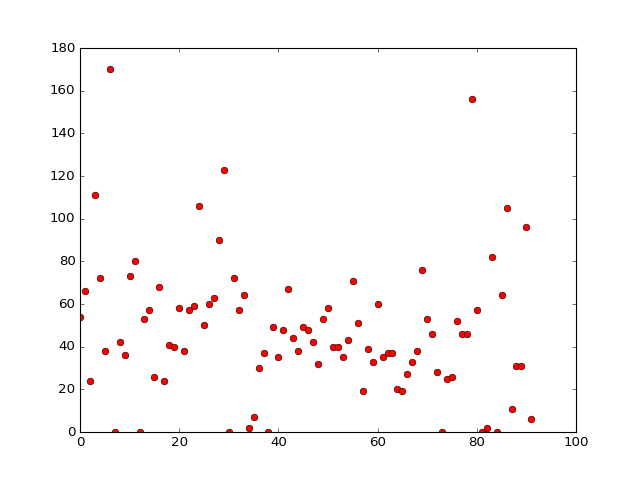

/home/sascwitt/Projects/test/WDs/20160814_1004_1/1/
161.3010171958
111.0


<IPython.core.display.Javascript object>


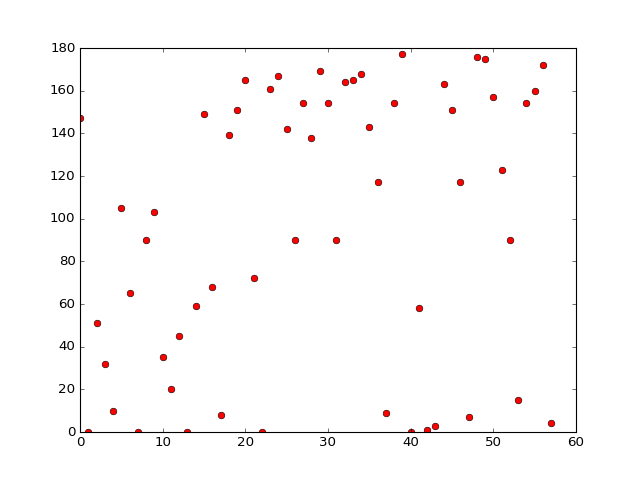

/home/sascwitt/Projects/test/WDs/20160814_1004_1/2/
177.18444331579002
87.0


<IPython.core.display.Javascript object>


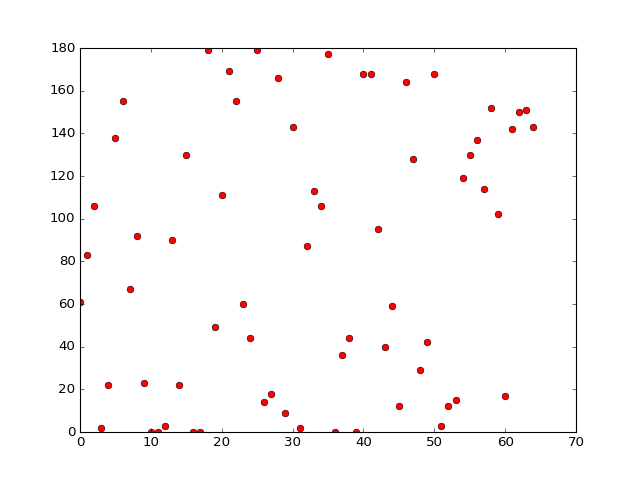

/home/sascwitt/Projects/test/WDs/20160814_1002_1/5/
20.6589100633
29.0


<IPython.core.display.Javascript object>


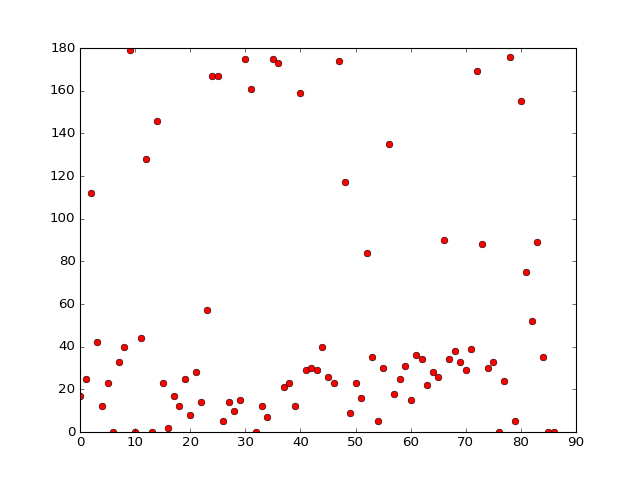

/home/sascwitt/Projects/test/WDs/20160814_1003_1/19/
66.80140948600001
73.0


<IPython.core.display.Javascript object>


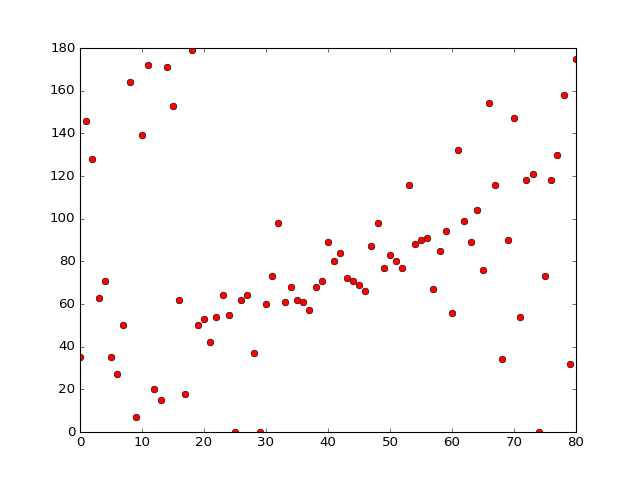

66.80140948600001


In [13]:
for index, i in enumerate(images):
    a = float(fm_csv(keys[index] + 'result.csv')["Angle"]) % 360
        
    if a > 180:
        a -= 180

    print(keys[index])
    print(a)
    #print(np.median(i.argmax(axis=1)))
    
    est = TheilSenRegressor()
    maximum = i.argmax(axis=1)
    est.fit(np.arange(0, len(i))[:,np.newaxis], maximum)
    print(np.median(maximum))
    
    cos = []
    sin = []
    
    for m in maximum:
        cos.append(abs(np.cos(m)))
        sin.append(abs(np.sin(m)))
    
    
    
    #cos_sin_mat = np.array([[cos], [sin], [leng]])
   
    fig = plt.figure()
    
    
    
    plt.plot(maximum, 'ro')
    #plt.plot(est.predict(np.arange(0,len(i))[:,np.newaxis]), "y", lw=2)
    #plt.plot([0, len(i)], [a, a], 'k-', lw=2)
    #plt.imshow(np.rot90(i, 3))
    plt.show()
    

print(a)



/usr/lib/python3/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


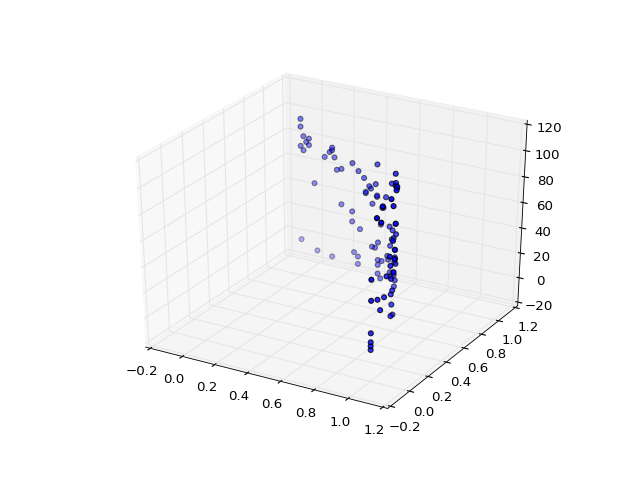

[102  96   0  66  52   0 126  90   0 114  19 112 164 126 144   0 138  54
  43  51 163  34  37  38  58  56  45   6 134  16  18  54  65  36 171  69
  32   4  35  43   0  16  20 111 145  74  41  52  11  23  38  21 165  44
  40  95   0  22  58  32  14  51  50  62 118  34  55  55  18  59  60  76
  48  74  63  56 157  66  81  89 103 111  90  79  87  78  88 102 138  93
  89  55 144   6 162 145  30  90 151 177 156 144  15  90   7]


In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

leng = np.arange(len(images[0]))
    
maximum = images[0].argmax(axis=1)

print(maximum)

cos = []
sin = []
    
for m in maximum:
    cos.append(abs(np.cos(np.radians(angles[m]))))
    sin.append(abs(np.sin(np.radians(angles[m]))))
    

for x, y, z in [(cos, sin, leng)]:
    xs = x
    ys = y
    zs = z
    ax.scatter(xs, ys, zs)
plt.show()